In [12]:
import os
import sys
import numpy as np
import json
import matplotlib.pyplot as plt
import mdtraj
import urllib.request
import yaml
import pprint
#sys.path.insert(1, '../BuildDatabank/')
sys.path.insert(1, '../../Databank/Scripts/BuildDatabank/')
from databankLibrary import lipids_dict, molecules_dict

In [41]:
DvsHYD = []
Ds = []
Ts = []
HYD = []
DOI = []
FFSOL = []
FF = []
lipidfrac = {}
molfrac = {}
for lipid in lipids_dict:
    lipidfrac[lipid] = []
for molecule in molecules_dict:
    molfrac[molecule] = []

    
for subdir, dirs, files in os.walk(r'../Data/WATERdiffusion/'):
    for filename in files:
        filepath = subdir + os.sep + filename
        if filepath.endswith("README.yaml"):
            READMEfilepath = subdir + '/README.yaml'
            print(subdir)
            waterDIFFUSIONfilepath = subdir + '/WATERlateralMSD.xvg'
            with open(READMEfilepath) as yaml_file:
                readme = yaml.load(yaml_file, Loader=yaml.FullLoader)
                
                Nlipids = 0
                for lipid in readme['COMPOSITION']:
                    if lipid in lipids_dict:
                    #if np.sum(readme['COMPOSITION'][lipid]):
                        Nlipids += np.sum(readme['COMPOSITION'][lipid]['COUNT'])
                
                D = float(os.popen('grep D ' + waterDIFFUSIONfilepath + " | grep = | awk '{print $5}'").read())
                T = float(readme.get('TEMPERATURE'))
                
                
                #for lipid in lipids_dict:
                    #if readme.get('N' + lipid):
                for lipid in readme['COMPOSITION']:
                    if lipid in lipids_dict:
                        try:
                            lipidfrac[lipid].append(np.sum(readme['COMPOSITION'][lipid]['COUNT']) / Nlipids)
                        except:
                            lipidfrac[lipid].append(0)

                for molecule in readme['COMPOSITION']:
                    if molecule in lipids_dict or molecule == 'SOL':
                        continue
                    #if readme.get(molecule):
                        #print(np.sum(readme.get(molecule)),readme.get('NSOL'))
                    try:
                        molfrac[molecule].append(np.sum(readme.get(molecule)) / readme.get('NSOL'))
                    except:
                        molfrac[molecule].append(0)
                    
                Ts.append(T)
                Ds.append(D)
                HYD.append(readme['COMPOSITION']['SOL']['COUNT']/Nlipids)
                DOI.append(readme.get('DOI'))
                FFSOL.append(readme.get('FFSOL'))
                FF.append(readme.get('FF'))
                print(HYD,Nlipids)

../Data/WATERdiffusion/006/559/006559139e730fc43b244726992145c2f37a1461/3c99810c45a83b4ba0e54a69fdea8817498a8930
[40.54054054054054] 222
../Data/WATERdiffusion/007/494/007494777cfaf4a3bbaf66335df4b9aa48c990e0/542f342c6c9c1b0647bcb98de53be96d5af4b505
[40.54054054054054, 45.0] 200
../Data/WATERdiffusion/007/ed1/007ed172073ee268b07f29ecd413eb9de13a3d47/895cd634e9106b949e0c15cd8873592748b66fed
[40.54054054054054, 45.0, 45.0] 200
../Data/WATERdiffusion/019/eb8/019eb8d7691998587faa1e618272a564ff9e697e/577a6cc9d00effd20baf941d520a23d91701352d
[40.54054054054054, 45.0, 45.0, 50.0] 128
../Data/WATERdiffusion/027/fe6/027fe66035161f978c2289b10ed49a435ad1d0fe/d751c636ef8fde62a312b29dfb5a074ae433534b
[40.54054054054054, 45.0, 45.0, 50.0, 40.3125] 1152
../Data/WATERdiffusion/02b/984/02b98418d9965749ac943ecae9627cfdd1dfbdcd/7339faa76da6c93cfee03e59f399e2eed1628b53
[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0] 128
../Data/WATERdiffusion/02e/922/02e9220d27c2d6f4aa76992ae66014ac8d5557e0/4237bd2c8

[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 45.0, 40.0, 140.68867924528303, 140.68867924528303, 105.0, 34.83050847457627, 31.0, 31.46853146853147, 50.15972222222222, 40.3984375, 37.34090909090909, 50.0, 40.0, 36.0, 50.0, 50.0, 35.0, 48.375, 45.0, 50.0, 35.0, 50.0, 50.0, 44.625, 31.46853146853147] 286
../Data/WATERdiffusion/16a/a70/16aa70c118dbfdbb7bd8e0462575e2776e0dec9a/ba8633f6385dbf4c344b8a7580603620b0d52603
[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 45.0, 40.0, 140.68867924528303, 140.68867924528303, 105.0, 34.83050847457627, 31.0, 31.46853146853147, 50.15972222222222, 40.3984375, 37.34090909090909, 50.0, 40.0, 36.0, 50.0, 50.0, 35.0, 48.375, 45.0, 50.0, 35.0, 50.0, 50.0, 44.625, 31.46853146853147, 28.1] 160
../Data/WATERdiffusion/16e/05e/16e05ef76ec9e852afadd7e2bc1639becf9c153b/abdfd2e517f2b5aefdefea5ad0831e3f7d0f4ab8
[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 45.0, 40.0, 140.68867924528303, 1

[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 45.0, 40.0, 140.68867924528303, 140.68867924528303, 105.0, 34.83050847457627, 31.0, 31.46853146853147, 50.15972222222222, 40.3984375, 37.34090909090909, 50.0, 40.0, 36.0, 50.0, 50.0, 35.0, 48.375, 45.0, 50.0, 35.0, 50.0, 50.0, 44.625, 31.46853146853147, 28.1, 36.228, 40.0, 50.0, 35.95, 166.5703125, 30.0, 45.0, 50.0, 50.0, 50.0, 31.09722222222222, 35.0, 45.0, 50.0, 30.416666666666668, 30.11111111111111, 50.0, 31.0] 128
../Data/WATERdiffusion/815/ad3/815ad324c34bfdfcbdc34ead95481bf38723c42b/657393f95833364bff072b6824252dbd998c31c9
[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 45.0, 40.0, 140.68867924528303, 140.68867924528303, 105.0, 34.83050847457627, 31.0, 31.46853146853147, 50.15972222222222, 40.3984375, 37.34090909090909, 50.0, 40.0, 36.0, 50.0, 50.0, 35.0, 48.375, 45.0, 50.0, 35.0, 50.0, 50.0, 44.625, 31.46853146853147, 28.1, 36.228, 40.0, 50.0, 35.95, 166.5703125, 30.0, 45.0, 50.0, 5

[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 45.0, 40.0, 140.68867924528303, 140.68867924528303, 105.0, 34.83050847457627, 31.0, 31.46853146853147, 50.15972222222222, 40.3984375, 37.34090909090909, 50.0, 40.0, 36.0, 50.0, 50.0, 35.0, 48.375, 45.0, 50.0, 35.0, 50.0, 50.0, 44.625, 31.46853146853147, 28.1, 36.228, 40.0, 50.0, 35.95, 166.5703125, 30.0, 45.0, 50.0, 50.0, 50.0, 31.09722222222222, 35.0, 45.0, 50.0, 30.416666666666668, 30.11111111111111, 50.0, 31.0, 45.0, 45.0, 50.0, 40.3125, 35.0, 40.54054054054054, 40.3125, 50.0, 31.46853146853147, 165.984375, 40.0, 40.0, 31.0, 31.46853146853147, 49.458333333333336, 50.0, 30.38888888888889] 72
../Data/WATERdiffusion/8bd/67c/8bd67cee9e378f25ad0826c4da436e44d72038be/6a3d11e69a7d3d3bac227a6ba9b74b05548c2fe6
[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 45.0, 40.0, 140.68867924528303, 140.68867924528303, 105.0, 34.83050847457627, 31.0, 31.46853146853147, 50.15972222222222, 40.3984375, 37.340

[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 45.0, 40.0, 140.68867924528303, 140.68867924528303, 105.0, 34.83050847457627, 31.0, 31.46853146853147, 50.15972222222222, 40.3984375, 37.34090909090909, 50.0, 40.0, 36.0, 50.0, 50.0, 35.0, 48.375, 45.0, 50.0, 35.0, 50.0, 50.0, 44.625, 31.46853146853147, 28.1, 36.228, 40.0, 50.0, 35.95, 166.5703125, 30.0, 45.0, 50.0, 50.0, 50.0, 31.09722222222222, 35.0, 45.0, 50.0, 30.416666666666668, 30.11111111111111, 50.0, 31.0, 45.0, 45.0, 50.0, 40.3125, 35.0, 40.54054054054054, 40.3125, 50.0, 31.46853146853147, 165.984375, 40.0, 40.0, 31.0, 31.46853146853147, 49.458333333333336, 50.0, 30.38888888888889, 40.0, 48.375, 39.71484375, 140.68867924528303, 55.9140625, 60.0, 50.0, 37.02777777777778, 50.0, 45.0, 40.0, 35.0, 50.0, 42.37234042553192] 188
../Data/WATERdiffusion/b86/e1d/b86e1d05121438d07f56d447bf4a0ec1add4af0c/b7cad43d5423af6dee7da746eabe48b79e79c271
[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 

../Data/WATERdiffusion/be6/5d5/be65d56aa0b9732c1f75b8e2de40133ac6c5f706/fe08222fa3d4cc603161b05233be0af37dd3cc8b
[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 45.0, 40.0, 140.68867924528303, 140.68867924528303, 105.0, 34.83050847457627, 31.0, 31.46853146853147, 50.15972222222222, 40.3984375, 37.34090909090909, 50.0, 40.0, 36.0, 50.0, 50.0, 35.0, 48.375, 45.0, 50.0, 35.0, 50.0, 50.0, 44.625, 31.46853146853147, 28.1, 36.228, 40.0, 50.0, 35.95, 166.5703125, 30.0, 45.0, 50.0, 50.0, 50.0, 31.09722222222222, 35.0, 45.0, 50.0, 30.416666666666668, 30.11111111111111, 50.0, 31.0, 45.0, 45.0, 50.0, 40.3125, 35.0, 40.54054054054054, 40.3125, 50.0, 31.46853146853147, 165.984375, 40.0, 40.0, 31.0, 31.46853146853147, 49.458333333333336, 50.0, 30.38888888888889, 40.0, 48.375, 39.71484375, 140.68867924528303, 55.9140625, 60.0, 50.0, 37.02777777777778, 50.0, 45.0, 40.0, 35.0, 50.0, 42.37234042553192, 48.916666666666664, 50.0, 7.0, 45.0, 48.6875, 40.05952380952381, 40.0, 40.0, 

[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 45.0, 40.0, 140.68867924528303, 140.68867924528303, 105.0, 34.83050847457627, 31.0, 31.46853146853147, 50.15972222222222, 40.3984375, 37.34090909090909, 50.0, 40.0, 36.0, 50.0, 50.0, 35.0, 48.375, 45.0, 50.0, 35.0, 50.0, 50.0, 44.625, 31.46853146853147, 28.1, 36.228, 40.0, 50.0, 35.95, 166.5703125, 30.0, 45.0, 50.0, 50.0, 50.0, 31.09722222222222, 35.0, 45.0, 50.0, 30.416666666666668, 30.11111111111111, 50.0, 31.0, 45.0, 45.0, 50.0, 40.3125, 35.0, 40.54054054054054, 40.3125, 50.0, 31.46853146853147, 165.984375, 40.0, 40.0, 31.0, 31.46853146853147, 49.458333333333336, 50.0, 30.38888888888889, 40.0, 48.375, 39.71484375, 140.68867924528303, 55.9140625, 60.0, 50.0, 37.02777777777778, 50.0, 45.0, 40.0, 35.0, 50.0, 42.37234042553192, 48.916666666666664, 50.0, 7.0, 45.0, 48.6875, 40.05952380952381, 40.0, 40.0, 40.0, 48.6875, 60.0, 40.0, 50.0, 45.0, 43.75, 50.0, 50.0, 50.0, 50.0, 40.0, 50.0, 50.0] 128
../Data/WATERdiffusio

[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 45.0, 40.0, 140.68867924528303, 140.68867924528303, 105.0, 34.83050847457627, 31.0, 31.46853146853147, 50.15972222222222, 40.3984375, 37.34090909090909, 50.0, 40.0, 36.0, 50.0, 50.0, 35.0, 48.375, 45.0, 50.0, 35.0, 50.0, 50.0, 44.625, 31.46853146853147, 28.1, 36.228, 40.0, 50.0, 35.95, 166.5703125, 30.0, 45.0, 50.0, 50.0, 50.0, 31.09722222222222, 35.0, 45.0, 50.0, 30.416666666666668, 30.11111111111111, 50.0, 31.0, 45.0, 45.0, 50.0, 40.3125, 35.0, 40.54054054054054, 40.3125, 50.0, 31.46853146853147, 165.984375, 40.0, 40.0, 31.0, 31.46853146853147, 49.458333333333336, 50.0, 30.38888888888889, 40.0, 48.375, 39.71484375, 140.68867924528303, 55.9140625, 60.0, 50.0, 37.02777777777778, 50.0, 45.0, 40.0, 35.0, 50.0, 42.37234042553192, 48.916666666666664, 50.0, 7.0, 45.0, 48.6875, 40.05952380952381, 40.0, 40.0, 40.0, 48.6875, 60.0, 40.0, 50.0, 45.0, 43.75, 50.0, 50.0, 50.0, 50.0, 40.0, 50.0, 50.0, 31.46853146853147, 36.0, 

[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 45.0, 40.0, 140.68867924528303, 140.68867924528303, 105.0, 34.83050847457627, 31.0, 31.46853146853147, 50.15972222222222, 40.3984375, 37.34090909090909, 50.0, 40.0, 36.0, 50.0, 50.0, 35.0, 48.375, 45.0, 50.0, 35.0, 50.0, 50.0, 44.625, 31.46853146853147, 28.1, 36.228, 40.0, 50.0, 35.95, 166.5703125, 30.0, 45.0, 50.0, 50.0, 50.0, 31.09722222222222, 35.0, 45.0, 50.0, 30.416666666666668, 30.11111111111111, 50.0, 31.0, 45.0, 45.0, 50.0, 40.3125, 35.0, 40.54054054054054, 40.3125, 50.0, 31.46853146853147, 165.984375, 40.0, 40.0, 31.0, 31.46853146853147, 49.458333333333336, 50.0, 30.38888888888889, 40.0, 48.375, 39.71484375, 140.68867924528303, 55.9140625, 60.0, 50.0, 37.02777777777778, 50.0, 45.0, 40.0, 35.0, 50.0, 42.37234042553192, 48.916666666666664, 50.0, 7.0, 45.0, 48.6875, 40.05952380952381, 40.0, 40.0, 40.0, 48.6875, 60.0, 40.0, 50.0, 45.0, 43.75, 50.0, 50.0, 50.0, 50.0, 40.0, 50.0, 50.0, 31.46853146853147, 36.0, 

../Data/WATERdiffusion/3d1/f82/3d1f825918b4a3fd2f2dc52ad9d6948a78773bd0/e269c2c27722ad263b0d0f883e62e28f60d1ed1a
[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 45.0, 40.0, 140.68867924528303, 140.68867924528303, 105.0, 34.83050847457627, 31.0, 31.46853146853147, 50.15972222222222, 40.3984375, 37.34090909090909, 50.0, 40.0, 36.0, 50.0, 50.0, 35.0, 48.375, 45.0, 50.0, 35.0, 50.0, 50.0, 44.625, 31.46853146853147, 28.1, 36.228, 40.0, 50.0, 35.95, 166.5703125, 30.0, 45.0, 50.0, 50.0, 50.0, 31.09722222222222, 35.0, 45.0, 50.0, 30.416666666666668, 30.11111111111111, 50.0, 31.0, 45.0, 45.0, 50.0, 40.3125, 35.0, 40.54054054054054, 40.3125, 50.0, 31.46853146853147, 165.984375, 40.0, 40.0, 31.0, 31.46853146853147, 49.458333333333336, 50.0, 30.38888888888889, 40.0, 48.375, 39.71484375, 140.68867924528303, 55.9140625, 60.0, 50.0, 37.02777777777778, 50.0, 45.0, 40.0, 35.0, 50.0, 42.37234042553192, 48.916666666666664, 50.0, 7.0, 45.0, 48.6875, 40.05952380952381, 40.0, 40.0, 

[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 45.0, 40.0, 140.68867924528303, 140.68867924528303, 105.0, 34.83050847457627, 31.0, 31.46853146853147, 50.15972222222222, 40.3984375, 37.34090909090909, 50.0, 40.0, 36.0, 50.0, 50.0, 35.0, 48.375, 45.0, 50.0, 35.0, 50.0, 50.0, 44.625, 31.46853146853147, 28.1, 36.228, 40.0, 50.0, 35.95, 166.5703125, 30.0, 45.0, 50.0, 50.0, 50.0, 31.09722222222222, 35.0, 45.0, 50.0, 30.416666666666668, 30.11111111111111, 50.0, 31.0, 45.0, 45.0, 50.0, 40.3125, 35.0, 40.54054054054054, 40.3125, 50.0, 31.46853146853147, 165.984375, 40.0, 40.0, 31.0, 31.46853146853147, 49.458333333333336, 50.0, 30.38888888888889, 40.0, 48.375, 39.71484375, 140.68867924528303, 55.9140625, 60.0, 50.0, 37.02777777777778, 50.0, 45.0, 40.0, 35.0, 50.0, 42.37234042553192, 48.916666666666664, 50.0, 7.0, 45.0, 48.6875, 40.05952380952381, 40.0, 40.0, 40.0, 48.6875, 60.0, 40.0, 50.0, 45.0, 43.75, 50.0, 50.0, 50.0, 50.0, 40.0, 50.0, 50.0, 31.46853146853147, 36.0, 

[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 45.0, 40.0, 140.68867924528303, 140.68867924528303, 105.0, 34.83050847457627, 31.0, 31.46853146853147, 50.15972222222222, 40.3984375, 37.34090909090909, 50.0, 40.0, 36.0, 50.0, 50.0, 35.0, 48.375, 45.0, 50.0, 35.0, 50.0, 50.0, 44.625, 31.46853146853147, 28.1, 36.228, 40.0, 50.0, 35.95, 166.5703125, 30.0, 45.0, 50.0, 50.0, 50.0, 31.09722222222222, 35.0, 45.0, 50.0, 30.416666666666668, 30.11111111111111, 50.0, 31.0, 45.0, 45.0, 50.0, 40.3125, 35.0, 40.54054054054054, 40.3125, 50.0, 31.46853146853147, 165.984375, 40.0, 40.0, 31.0, 31.46853146853147, 49.458333333333336, 50.0, 30.38888888888889, 40.0, 48.375, 39.71484375, 140.68867924528303, 55.9140625, 60.0, 50.0, 37.02777777777778, 50.0, 45.0, 40.0, 35.0, 50.0, 42.37234042553192, 48.916666666666664, 50.0, 7.0, 45.0, 48.6875, 40.05952380952381, 40.0, 40.0, 40.0, 48.6875, 60.0, 40.0, 50.0, 45.0, 43.75, 50.0, 50.0, 50.0, 50.0, 40.0, 50.0, 50.0, 31.46853146853147, 36.0, 

[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 45.0, 40.0, 140.68867924528303, 140.68867924528303, 105.0, 34.83050847457627, 31.0, 31.46853146853147, 50.15972222222222, 40.3984375, 37.34090909090909, 50.0, 40.0, 36.0, 50.0, 50.0, 35.0, 48.375, 45.0, 50.0, 35.0, 50.0, 50.0, 44.625, 31.46853146853147, 28.1, 36.228, 40.0, 50.0, 35.95, 166.5703125, 30.0, 45.0, 50.0, 50.0, 50.0, 31.09722222222222, 35.0, 45.0, 50.0, 30.416666666666668, 30.11111111111111, 50.0, 31.0, 45.0, 45.0, 50.0, 40.3125, 35.0, 40.54054054054054, 40.3125, 50.0, 31.46853146853147, 165.984375, 40.0, 40.0, 31.0, 31.46853146853147, 49.458333333333336, 50.0, 30.38888888888889, 40.0, 48.375, 39.71484375, 140.68867924528303, 55.9140625, 60.0, 50.0, 37.02777777777778, 50.0, 45.0, 40.0, 35.0, 50.0, 42.37234042553192, 48.916666666666664, 50.0, 7.0, 45.0, 48.6875, 40.05952380952381, 40.0, 40.0, 40.0, 48.6875, 60.0, 40.0, 50.0, 45.0, 43.75, 50.0, 50.0, 50.0, 50.0, 40.0, 50.0, 50.0, 31.46853146853147, 36.0, 

[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 45.0, 40.0, 140.68867924528303, 140.68867924528303, 105.0, 34.83050847457627, 31.0, 31.46853146853147, 50.15972222222222, 40.3984375, 37.34090909090909, 50.0, 40.0, 36.0, 50.0, 50.0, 35.0, 48.375, 45.0, 50.0, 35.0, 50.0, 50.0, 44.625, 31.46853146853147, 28.1, 36.228, 40.0, 50.0, 35.95, 166.5703125, 30.0, 45.0, 50.0, 50.0, 50.0, 31.09722222222222, 35.0, 45.0, 50.0, 30.416666666666668, 30.11111111111111, 50.0, 31.0, 45.0, 45.0, 50.0, 40.3125, 35.0, 40.54054054054054, 40.3125, 50.0, 31.46853146853147, 165.984375, 40.0, 40.0, 31.0, 31.46853146853147, 49.458333333333336, 50.0, 30.38888888888889, 40.0, 48.375, 39.71484375, 140.68867924528303, 55.9140625, 60.0, 50.0, 37.02777777777778, 50.0, 45.0, 40.0, 35.0, 50.0, 42.37234042553192, 48.916666666666664, 50.0, 7.0, 45.0, 48.6875, 40.05952380952381, 40.0, 40.0, 40.0, 48.6875, 60.0, 40.0, 50.0, 45.0, 43.75, 50.0, 50.0, 50.0, 50.0, 40.0, 50.0, 50.0, 31.46853146853147, 36.0, 

[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 45.0, 40.0, 140.68867924528303, 140.68867924528303, 105.0, 34.83050847457627, 31.0, 31.46853146853147, 50.15972222222222, 40.3984375, 37.34090909090909, 50.0, 40.0, 36.0, 50.0, 50.0, 35.0, 48.375, 45.0, 50.0, 35.0, 50.0, 50.0, 44.625, 31.46853146853147, 28.1, 36.228, 40.0, 50.0, 35.95, 166.5703125, 30.0, 45.0, 50.0, 50.0, 50.0, 31.09722222222222, 35.0, 45.0, 50.0, 30.416666666666668, 30.11111111111111, 50.0, 31.0, 45.0, 45.0, 50.0, 40.3125, 35.0, 40.54054054054054, 40.3125, 50.0, 31.46853146853147, 165.984375, 40.0, 40.0, 31.0, 31.46853146853147, 49.458333333333336, 50.0, 30.38888888888889, 40.0, 48.375, 39.71484375, 140.68867924528303, 55.9140625, 60.0, 50.0, 37.02777777777778, 50.0, 45.0, 40.0, 35.0, 50.0, 42.37234042553192, 48.916666666666664, 50.0, 7.0, 45.0, 48.6875, 40.05952380952381, 40.0, 40.0, 40.0, 48.6875, 60.0, 40.0, 50.0, 45.0, 43.75, 50.0, 50.0, 50.0, 50.0, 40.0, 50.0, 50.0, 31.46853146853147, 36.0, 

[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 45.0, 40.0, 140.68867924528303, 140.68867924528303, 105.0, 34.83050847457627, 31.0, 31.46853146853147, 50.15972222222222, 40.3984375, 37.34090909090909, 50.0, 40.0, 36.0, 50.0, 50.0, 35.0, 48.375, 45.0, 50.0, 35.0, 50.0, 50.0, 44.625, 31.46853146853147, 28.1, 36.228, 40.0, 50.0, 35.95, 166.5703125, 30.0, 45.0, 50.0, 50.0, 50.0, 31.09722222222222, 35.0, 45.0, 50.0, 30.416666666666668, 30.11111111111111, 50.0, 31.0, 45.0, 45.0, 50.0, 40.3125, 35.0, 40.54054054054054, 40.3125, 50.0, 31.46853146853147, 165.984375, 40.0, 40.0, 31.0, 31.46853146853147, 49.458333333333336, 50.0, 30.38888888888889, 40.0, 48.375, 39.71484375, 140.68867924528303, 55.9140625, 60.0, 50.0, 37.02777777777778, 50.0, 45.0, 40.0, 35.0, 50.0, 42.37234042553192, 48.916666666666664, 50.0, 7.0, 45.0, 48.6875, 40.05952380952381, 40.0, 40.0, 40.0, 48.6875, 60.0, 40.0, 50.0, 45.0, 43.75, 50.0, 50.0, 50.0, 50.0, 40.0, 50.0, 50.0, 31.46853146853147, 36.0, 

[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 45.0, 40.0, 140.68867924528303, 140.68867924528303, 105.0, 34.83050847457627, 31.0, 31.46853146853147, 50.15972222222222, 40.3984375, 37.34090909090909, 50.0, 40.0, 36.0, 50.0, 50.0, 35.0, 48.375, 45.0, 50.0, 35.0, 50.0, 50.0, 44.625, 31.46853146853147, 28.1, 36.228, 40.0, 50.0, 35.95, 166.5703125, 30.0, 45.0, 50.0, 50.0, 50.0, 31.09722222222222, 35.0, 45.0, 50.0, 30.416666666666668, 30.11111111111111, 50.0, 31.0, 45.0, 45.0, 50.0, 40.3125, 35.0, 40.54054054054054, 40.3125, 50.0, 31.46853146853147, 165.984375, 40.0, 40.0, 31.0, 31.46853146853147, 49.458333333333336, 50.0, 30.38888888888889, 40.0, 48.375, 39.71484375, 140.68867924528303, 55.9140625, 60.0, 50.0, 37.02777777777778, 50.0, 45.0, 40.0, 35.0, 50.0, 42.37234042553192, 48.916666666666664, 50.0, 7.0, 45.0, 48.6875, 40.05952380952381, 40.0, 40.0, 40.0, 48.6875, 60.0, 40.0, 50.0, 45.0, 43.75, 50.0, 50.0, 50.0, 50.0, 40.0, 50.0, 50.0, 31.46853146853147, 36.0, 

[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 45.0, 40.0, 140.68867924528303, 140.68867924528303, 105.0, 34.83050847457627, 31.0, 31.46853146853147, 50.15972222222222, 40.3984375, 37.34090909090909, 50.0, 40.0, 36.0, 50.0, 50.0, 35.0, 48.375, 45.0, 50.0, 35.0, 50.0, 50.0, 44.625, 31.46853146853147, 28.1, 36.228, 40.0, 50.0, 35.95, 166.5703125, 30.0, 45.0, 50.0, 50.0, 50.0, 31.09722222222222, 35.0, 45.0, 50.0, 30.416666666666668, 30.11111111111111, 50.0, 31.0, 45.0, 45.0, 50.0, 40.3125, 35.0, 40.54054054054054, 40.3125, 50.0, 31.46853146853147, 165.984375, 40.0, 40.0, 31.0, 31.46853146853147, 49.458333333333336, 50.0, 30.38888888888889, 40.0, 48.375, 39.71484375, 140.68867924528303, 55.9140625, 60.0, 50.0, 37.02777777777778, 50.0, 45.0, 40.0, 35.0, 50.0, 42.37234042553192, 48.916666666666664, 50.0, 7.0, 45.0, 48.6875, 40.05952380952381, 40.0, 40.0, 40.0, 48.6875, 60.0, 40.0, 50.0, 45.0, 43.75, 50.0, 50.0, 50.0, 50.0, 40.0, 50.0, 50.0, 31.46853146853147, 36.0, 

[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 45.0, 40.0, 140.68867924528303, 140.68867924528303, 105.0, 34.83050847457627, 31.0, 31.46853146853147, 50.15972222222222, 40.3984375, 37.34090909090909, 50.0, 40.0, 36.0, 50.0, 50.0, 35.0, 48.375, 45.0, 50.0, 35.0, 50.0, 50.0, 44.625, 31.46853146853147, 28.1, 36.228, 40.0, 50.0, 35.95, 166.5703125, 30.0, 45.0, 50.0, 50.0, 50.0, 31.09722222222222, 35.0, 45.0, 50.0, 30.416666666666668, 30.11111111111111, 50.0, 31.0, 45.0, 45.0, 50.0, 40.3125, 35.0, 40.54054054054054, 40.3125, 50.0, 31.46853146853147, 165.984375, 40.0, 40.0, 31.0, 31.46853146853147, 49.458333333333336, 50.0, 30.38888888888889, 40.0, 48.375, 39.71484375, 140.68867924528303, 55.9140625, 60.0, 50.0, 37.02777777777778, 50.0, 45.0, 40.0, 35.0, 50.0, 42.37234042553192, 48.916666666666664, 50.0, 7.0, 45.0, 48.6875, 40.05952380952381, 40.0, 40.0, 40.0, 48.6875, 60.0, 40.0, 50.0, 45.0, 43.75, 50.0, 50.0, 50.0, 50.0, 40.0, 50.0, 50.0, 31.46853146853147, 36.0, 

../Data/WATERdiffusion/5e2/0fe/5e20fe22000d94eb54ce0e030c1dd2439796b331/839c970611cedad2e65068b6e412d84c12831ed6
[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 45.0, 40.0, 140.68867924528303, 140.68867924528303, 105.0, 34.83050847457627, 31.0, 31.46853146853147, 50.15972222222222, 40.3984375, 37.34090909090909, 50.0, 40.0, 36.0, 50.0, 50.0, 35.0, 48.375, 45.0, 50.0, 35.0, 50.0, 50.0, 44.625, 31.46853146853147, 28.1, 36.228, 40.0, 50.0, 35.95, 166.5703125, 30.0, 45.0, 50.0, 50.0, 50.0, 31.09722222222222, 35.0, 45.0, 50.0, 30.416666666666668, 30.11111111111111, 50.0, 31.0, 45.0, 45.0, 50.0, 40.3125, 35.0, 40.54054054054054, 40.3125, 50.0, 31.46853146853147, 165.984375, 40.0, 40.0, 31.0, 31.46853146853147, 49.458333333333336, 50.0, 30.38888888888889, 40.0, 48.375, 39.71484375, 140.68867924528303, 55.9140625, 60.0, 50.0, 37.02777777777778, 50.0, 45.0, 40.0, 35.0, 50.0, 42.37234042553192, 48.916666666666664, 50.0, 7.0, 45.0, 48.6875, 40.05952380952381, 40.0, 40.0, 

[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 45.0, 40.0, 140.68867924528303, 140.68867924528303, 105.0, 34.83050847457627, 31.0, 31.46853146853147, 50.15972222222222, 40.3984375, 37.34090909090909, 50.0, 40.0, 36.0, 50.0, 50.0, 35.0, 48.375, 45.0, 50.0, 35.0, 50.0, 50.0, 44.625, 31.46853146853147, 28.1, 36.228, 40.0, 50.0, 35.95, 166.5703125, 30.0, 45.0, 50.0, 50.0, 50.0, 31.09722222222222, 35.0, 45.0, 50.0, 30.416666666666668, 30.11111111111111, 50.0, 31.0, 45.0, 45.0, 50.0, 40.3125, 35.0, 40.54054054054054, 40.3125, 50.0, 31.46853146853147, 165.984375, 40.0, 40.0, 31.0, 31.46853146853147, 49.458333333333336, 50.0, 30.38888888888889, 40.0, 48.375, 39.71484375, 140.68867924528303, 55.9140625, 60.0, 50.0, 37.02777777777778, 50.0, 45.0, 40.0, 35.0, 50.0, 42.37234042553192, 48.916666666666664, 50.0, 7.0, 45.0, 48.6875, 40.05952380952381, 40.0, 40.0, 40.0, 48.6875, 60.0, 40.0, 50.0, 45.0, 43.75, 50.0, 50.0, 50.0, 50.0, 40.0, 50.0, 50.0, 31.46853146853147, 36.0, 

[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 45.0, 40.0, 140.68867924528303, 140.68867924528303, 105.0, 34.83050847457627, 31.0, 31.46853146853147, 50.15972222222222, 40.3984375, 37.34090909090909, 50.0, 40.0, 36.0, 50.0, 50.0, 35.0, 48.375, 45.0, 50.0, 35.0, 50.0, 50.0, 44.625, 31.46853146853147, 28.1, 36.228, 40.0, 50.0, 35.95, 166.5703125, 30.0, 45.0, 50.0, 50.0, 50.0, 31.09722222222222, 35.0, 45.0, 50.0, 30.416666666666668, 30.11111111111111, 50.0, 31.0, 45.0, 45.0, 50.0, 40.3125, 35.0, 40.54054054054054, 40.3125, 50.0, 31.46853146853147, 165.984375, 40.0, 40.0, 31.0, 31.46853146853147, 49.458333333333336, 50.0, 30.38888888888889, 40.0, 48.375, 39.71484375, 140.68867924528303, 55.9140625, 60.0, 50.0, 37.02777777777778, 50.0, 45.0, 40.0, 35.0, 50.0, 42.37234042553192, 48.916666666666664, 50.0, 7.0, 45.0, 48.6875, 40.05952380952381, 40.0, 40.0, 40.0, 48.6875, 60.0, 40.0, 50.0, 45.0, 43.75, 50.0, 50.0, 50.0, 50.0, 40.0, 50.0, 50.0, 31.46853146853147, 36.0, 

[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 45.0, 40.0, 140.68867924528303, 140.68867924528303, 105.0, 34.83050847457627, 31.0, 31.46853146853147, 50.15972222222222, 40.3984375, 37.34090909090909, 50.0, 40.0, 36.0, 50.0, 50.0, 35.0, 48.375, 45.0, 50.0, 35.0, 50.0, 50.0, 44.625, 31.46853146853147, 28.1, 36.228, 40.0, 50.0, 35.95, 166.5703125, 30.0, 45.0, 50.0, 50.0, 50.0, 31.09722222222222, 35.0, 45.0, 50.0, 30.416666666666668, 30.11111111111111, 50.0, 31.0, 45.0, 45.0, 50.0, 40.3125, 35.0, 40.54054054054054, 40.3125, 50.0, 31.46853146853147, 165.984375, 40.0, 40.0, 31.0, 31.46853146853147, 49.458333333333336, 50.0, 30.38888888888889, 40.0, 48.375, 39.71484375, 140.68867924528303, 55.9140625, 60.0, 50.0, 37.02777777777778, 50.0, 45.0, 40.0, 35.0, 50.0, 42.37234042553192, 48.916666666666664, 50.0, 7.0, 45.0, 48.6875, 40.05952380952381, 40.0, 40.0, 40.0, 48.6875, 60.0, 40.0, 50.0, 45.0, 43.75, 50.0, 50.0, 50.0, 50.0, 40.0, 50.0, 50.0, 31.46853146853147, 36.0, 

[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 45.0, 40.0, 140.68867924528303, 140.68867924528303, 105.0, 34.83050847457627, 31.0, 31.46853146853147, 50.15972222222222, 40.3984375, 37.34090909090909, 50.0, 40.0, 36.0, 50.0, 50.0, 35.0, 48.375, 45.0, 50.0, 35.0, 50.0, 50.0, 44.625, 31.46853146853147, 28.1, 36.228, 40.0, 50.0, 35.95, 166.5703125, 30.0, 45.0, 50.0, 50.0, 50.0, 31.09722222222222, 35.0, 45.0, 50.0, 30.416666666666668, 30.11111111111111, 50.0, 31.0, 45.0, 45.0, 50.0, 40.3125, 35.0, 40.54054054054054, 40.3125, 50.0, 31.46853146853147, 165.984375, 40.0, 40.0, 31.0, 31.46853146853147, 49.458333333333336, 50.0, 30.38888888888889, 40.0, 48.375, 39.71484375, 140.68867924528303, 55.9140625, 60.0, 50.0, 37.02777777777778, 50.0, 45.0, 40.0, 35.0, 50.0, 42.37234042553192, 48.916666666666664, 50.0, 7.0, 45.0, 48.6875, 40.05952380952381, 40.0, 40.0, 40.0, 48.6875, 60.0, 40.0, 50.0, 45.0, 43.75, 50.0, 50.0, 50.0, 50.0, 40.0, 50.0, 50.0, 31.46853146853147, 36.0, 

[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 45.0, 40.0, 140.68867924528303, 140.68867924528303, 105.0, 34.83050847457627, 31.0, 31.46853146853147, 50.15972222222222, 40.3984375, 37.34090909090909, 50.0, 40.0, 36.0, 50.0, 50.0, 35.0, 48.375, 45.0, 50.0, 35.0, 50.0, 50.0, 44.625, 31.46853146853147, 28.1, 36.228, 40.0, 50.0, 35.95, 166.5703125, 30.0, 45.0, 50.0, 50.0, 50.0, 31.09722222222222, 35.0, 45.0, 50.0, 30.416666666666668, 30.11111111111111, 50.0, 31.0, 45.0, 45.0, 50.0, 40.3125, 35.0, 40.54054054054054, 40.3125, 50.0, 31.46853146853147, 165.984375, 40.0, 40.0, 31.0, 31.46853146853147, 49.458333333333336, 50.0, 30.38888888888889, 40.0, 48.375, 39.71484375, 140.68867924528303, 55.9140625, 60.0, 50.0, 37.02777777777778, 50.0, 45.0, 40.0, 35.0, 50.0, 42.37234042553192, 48.916666666666664, 50.0, 7.0, 45.0, 48.6875, 40.05952380952381, 40.0, 40.0, 40.0, 48.6875, 60.0, 40.0, 50.0, 45.0, 43.75, 50.0, 50.0, 50.0, 50.0, 40.0, 50.0, 50.0, 31.46853146853147, 36.0, 

[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 45.0, 40.0, 140.68867924528303, 140.68867924528303, 105.0, 34.83050847457627, 31.0, 31.46853146853147, 50.15972222222222, 40.3984375, 37.34090909090909, 50.0, 40.0, 36.0, 50.0, 50.0, 35.0, 48.375, 45.0, 50.0, 35.0, 50.0, 50.0, 44.625, 31.46853146853147, 28.1, 36.228, 40.0, 50.0, 35.95, 166.5703125, 30.0, 45.0, 50.0, 50.0, 50.0, 31.09722222222222, 35.0, 45.0, 50.0, 30.416666666666668, 30.11111111111111, 50.0, 31.0, 45.0, 45.0, 50.0, 40.3125, 35.0, 40.54054054054054, 40.3125, 50.0, 31.46853146853147, 165.984375, 40.0, 40.0, 31.0, 31.46853146853147, 49.458333333333336, 50.0, 30.38888888888889, 40.0, 48.375, 39.71484375, 140.68867924528303, 55.9140625, 60.0, 50.0, 37.02777777777778, 50.0, 45.0, 40.0, 35.0, 50.0, 42.37234042553192, 48.916666666666664, 50.0, 7.0, 45.0, 48.6875, 40.05952380952381, 40.0, 40.0, 40.0, 48.6875, 60.0, 40.0, 50.0, 45.0, 43.75, 50.0, 50.0, 50.0, 50.0, 40.0, 50.0, 50.0, 31.46853146853147, 36.0, 

[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 45.0, 40.0, 140.68867924528303, 140.68867924528303, 105.0, 34.83050847457627, 31.0, 31.46853146853147, 50.15972222222222, 40.3984375, 37.34090909090909, 50.0, 40.0, 36.0, 50.0, 50.0, 35.0, 48.375, 45.0, 50.0, 35.0, 50.0, 50.0, 44.625, 31.46853146853147, 28.1, 36.228, 40.0, 50.0, 35.95, 166.5703125, 30.0, 45.0, 50.0, 50.0, 50.0, 31.09722222222222, 35.0, 45.0, 50.0, 30.416666666666668, 30.11111111111111, 50.0, 31.0, 45.0, 45.0, 50.0, 40.3125, 35.0, 40.54054054054054, 40.3125, 50.0, 31.46853146853147, 165.984375, 40.0, 40.0, 31.0, 31.46853146853147, 49.458333333333336, 50.0, 30.38888888888889, 40.0, 48.375, 39.71484375, 140.68867924528303, 55.9140625, 60.0, 50.0, 37.02777777777778, 50.0, 45.0, 40.0, 35.0, 50.0, 42.37234042553192, 48.916666666666664, 50.0, 7.0, 45.0, 48.6875, 40.05952380952381, 40.0, 40.0, 40.0, 48.6875, 60.0, 40.0, 50.0, 45.0, 43.75, 50.0, 50.0, 50.0, 50.0, 40.0, 50.0, 50.0, 31.46853146853147, 36.0, 

[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 45.0, 40.0, 140.68867924528303, 140.68867924528303, 105.0, 34.83050847457627, 31.0, 31.46853146853147, 50.15972222222222, 40.3984375, 37.34090909090909, 50.0, 40.0, 36.0, 50.0, 50.0, 35.0, 48.375, 45.0, 50.0, 35.0, 50.0, 50.0, 44.625, 31.46853146853147, 28.1, 36.228, 40.0, 50.0, 35.95, 166.5703125, 30.0, 45.0, 50.0, 50.0, 50.0, 31.09722222222222, 35.0, 45.0, 50.0, 30.416666666666668, 30.11111111111111, 50.0, 31.0, 45.0, 45.0, 50.0, 40.3125, 35.0, 40.54054054054054, 40.3125, 50.0, 31.46853146853147, 165.984375, 40.0, 40.0, 31.0, 31.46853146853147, 49.458333333333336, 50.0, 30.38888888888889, 40.0, 48.375, 39.71484375, 140.68867924528303, 55.9140625, 60.0, 50.0, 37.02777777777778, 50.0, 45.0, 40.0, 35.0, 50.0, 42.37234042553192, 48.916666666666664, 50.0, 7.0, 45.0, 48.6875, 40.05952380952381, 40.0, 40.0, 40.0, 48.6875, 60.0, 40.0, 50.0, 45.0, 43.75, 50.0, 50.0, 50.0, 50.0, 40.0, 50.0, 50.0, 31.46853146853147, 36.0, 

[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 45.0, 40.0, 140.68867924528303, 140.68867924528303, 105.0, 34.83050847457627, 31.0, 31.46853146853147, 50.15972222222222, 40.3984375, 37.34090909090909, 50.0, 40.0, 36.0, 50.0, 50.0, 35.0, 48.375, 45.0, 50.0, 35.0, 50.0, 50.0, 44.625, 31.46853146853147, 28.1, 36.228, 40.0, 50.0, 35.95, 166.5703125, 30.0, 45.0, 50.0, 50.0, 50.0, 31.09722222222222, 35.0, 45.0, 50.0, 30.416666666666668, 30.11111111111111, 50.0, 31.0, 45.0, 45.0, 50.0, 40.3125, 35.0, 40.54054054054054, 40.3125, 50.0, 31.46853146853147, 165.984375, 40.0, 40.0, 31.0, 31.46853146853147, 49.458333333333336, 50.0, 30.38888888888889, 40.0, 48.375, 39.71484375, 140.68867924528303, 55.9140625, 60.0, 50.0, 37.02777777777778, 50.0, 45.0, 40.0, 35.0, 50.0, 42.37234042553192, 48.916666666666664, 50.0, 7.0, 45.0, 48.6875, 40.05952380952381, 40.0, 40.0, 40.0, 48.6875, 60.0, 40.0, 50.0, 45.0, 43.75, 50.0, 50.0, 50.0, 50.0, 40.0, 50.0, 50.0, 31.46853146853147, 36.0, 

[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 45.0, 40.0, 140.68867924528303, 140.68867924528303, 105.0, 34.83050847457627, 31.0, 31.46853146853147, 50.15972222222222, 40.3984375, 37.34090909090909, 50.0, 40.0, 36.0, 50.0, 50.0, 35.0, 48.375, 45.0, 50.0, 35.0, 50.0, 50.0, 44.625, 31.46853146853147, 28.1, 36.228, 40.0, 50.0, 35.95, 166.5703125, 30.0, 45.0, 50.0, 50.0, 50.0, 31.09722222222222, 35.0, 45.0, 50.0, 30.416666666666668, 30.11111111111111, 50.0, 31.0, 45.0, 45.0, 50.0, 40.3125, 35.0, 40.54054054054054, 40.3125, 50.0, 31.46853146853147, 165.984375, 40.0, 40.0, 31.0, 31.46853146853147, 49.458333333333336, 50.0, 30.38888888888889, 40.0, 48.375, 39.71484375, 140.68867924528303, 55.9140625, 60.0, 50.0, 37.02777777777778, 50.0, 45.0, 40.0, 35.0, 50.0, 42.37234042553192, 48.916666666666664, 50.0, 7.0, 45.0, 48.6875, 40.05952380952381, 40.0, 40.0, 40.0, 48.6875, 60.0, 40.0, 50.0, 45.0, 43.75, 50.0, 50.0, 50.0, 50.0, 40.0, 50.0, 50.0, 31.46853146853147, 36.0, 

[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 45.0, 40.0, 140.68867924528303, 140.68867924528303, 105.0, 34.83050847457627, 31.0, 31.46853146853147, 50.15972222222222, 40.3984375, 37.34090909090909, 50.0, 40.0, 36.0, 50.0, 50.0, 35.0, 48.375, 45.0, 50.0, 35.0, 50.0, 50.0, 44.625, 31.46853146853147, 28.1, 36.228, 40.0, 50.0, 35.95, 166.5703125, 30.0, 45.0, 50.0, 50.0, 50.0, 31.09722222222222, 35.0, 45.0, 50.0, 30.416666666666668, 30.11111111111111, 50.0, 31.0, 45.0, 45.0, 50.0, 40.3125, 35.0, 40.54054054054054, 40.3125, 50.0, 31.46853146853147, 165.984375, 40.0, 40.0, 31.0, 31.46853146853147, 49.458333333333336, 50.0, 30.38888888888889, 40.0, 48.375, 39.71484375, 140.68867924528303, 55.9140625, 60.0, 50.0, 37.02777777777778, 50.0, 45.0, 40.0, 35.0, 50.0, 42.37234042553192, 48.916666666666664, 50.0, 7.0, 45.0, 48.6875, 40.05952380952381, 40.0, 40.0, 40.0, 48.6875, 60.0, 40.0, 50.0, 45.0, 43.75, 50.0, 50.0, 50.0, 50.0, 40.0, 50.0, 50.0, 31.46853146853147, 36.0, 

[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 45.0, 40.0, 140.68867924528303, 140.68867924528303, 105.0, 34.83050847457627, 31.0, 31.46853146853147, 50.15972222222222, 40.3984375, 37.34090909090909, 50.0, 40.0, 36.0, 50.0, 50.0, 35.0, 48.375, 45.0, 50.0, 35.0, 50.0, 50.0, 44.625, 31.46853146853147, 28.1, 36.228, 40.0, 50.0, 35.95, 166.5703125, 30.0, 45.0, 50.0, 50.0, 50.0, 31.09722222222222, 35.0, 45.0, 50.0, 30.416666666666668, 30.11111111111111, 50.0, 31.0, 45.0, 45.0, 50.0, 40.3125, 35.0, 40.54054054054054, 40.3125, 50.0, 31.46853146853147, 165.984375, 40.0, 40.0, 31.0, 31.46853146853147, 49.458333333333336, 50.0, 30.38888888888889, 40.0, 48.375, 39.71484375, 140.68867924528303, 55.9140625, 60.0, 50.0, 37.02777777777778, 50.0, 45.0, 40.0, 35.0, 50.0, 42.37234042553192, 48.916666666666664, 50.0, 7.0, 45.0, 48.6875, 40.05952380952381, 40.0, 40.0, 40.0, 48.6875, 60.0, 40.0, 50.0, 45.0, 43.75, 50.0, 50.0, 50.0, 50.0, 40.0, 50.0, 50.0, 31.46853146853147, 36.0, 

[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 45.0, 40.0, 140.68867924528303, 140.68867924528303, 105.0, 34.83050847457627, 31.0, 31.46853146853147, 50.15972222222222, 40.3984375, 37.34090909090909, 50.0, 40.0, 36.0, 50.0, 50.0, 35.0, 48.375, 45.0, 50.0, 35.0, 50.0, 50.0, 44.625, 31.46853146853147, 28.1, 36.228, 40.0, 50.0, 35.95, 166.5703125, 30.0, 45.0, 50.0, 50.0, 50.0, 31.09722222222222, 35.0, 45.0, 50.0, 30.416666666666668, 30.11111111111111, 50.0, 31.0, 45.0, 45.0, 50.0, 40.3125, 35.0, 40.54054054054054, 40.3125, 50.0, 31.46853146853147, 165.984375, 40.0, 40.0, 31.0, 31.46853146853147, 49.458333333333336, 50.0, 30.38888888888889, 40.0, 48.375, 39.71484375, 140.68867924528303, 55.9140625, 60.0, 50.0, 37.02777777777778, 50.0, 45.0, 40.0, 35.0, 50.0, 42.37234042553192, 48.916666666666664, 50.0, 7.0, 45.0, 48.6875, 40.05952380952381, 40.0, 40.0, 40.0, 48.6875, 60.0, 40.0, 50.0, 45.0, 43.75, 50.0, 50.0, 50.0, 50.0, 40.0, 50.0, 50.0, 31.46853146853147, 36.0, 

../Data/WATERdiffusion/9b3/085/9b3085df71a90fb15bde7f9152d811fc1b1ad346/79a426c93cd61c106a63f07bd053a1ac0c526ddd
[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 45.0, 40.0, 140.68867924528303, 140.68867924528303, 105.0, 34.83050847457627, 31.0, 31.46853146853147, 50.15972222222222, 40.3984375, 37.34090909090909, 50.0, 40.0, 36.0, 50.0, 50.0, 35.0, 48.375, 45.0, 50.0, 35.0, 50.0, 50.0, 44.625, 31.46853146853147, 28.1, 36.228, 40.0, 50.0, 35.95, 166.5703125, 30.0, 45.0, 50.0, 50.0, 50.0, 31.09722222222222, 35.0, 45.0, 50.0, 30.416666666666668, 30.11111111111111, 50.0, 31.0, 45.0, 45.0, 50.0, 40.3125, 35.0, 40.54054054054054, 40.3125, 50.0, 31.46853146853147, 165.984375, 40.0, 40.0, 31.0, 31.46853146853147, 49.458333333333336, 50.0, 30.38888888888889, 40.0, 48.375, 39.71484375, 140.68867924528303, 55.9140625, 60.0, 50.0, 37.02777777777778, 50.0, 45.0, 40.0, 35.0, 50.0, 42.37234042553192, 48.916666666666664, 50.0, 7.0, 45.0, 48.6875, 40.05952380952381, 40.0, 40.0, 

[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 45.0, 40.0, 140.68867924528303, 140.68867924528303, 105.0, 34.83050847457627, 31.0, 31.46853146853147, 50.15972222222222, 40.3984375, 37.34090909090909, 50.0, 40.0, 36.0, 50.0, 50.0, 35.0, 48.375, 45.0, 50.0, 35.0, 50.0, 50.0, 44.625, 31.46853146853147, 28.1, 36.228, 40.0, 50.0, 35.95, 166.5703125, 30.0, 45.0, 50.0, 50.0, 50.0, 31.09722222222222, 35.0, 45.0, 50.0, 30.416666666666668, 30.11111111111111, 50.0, 31.0, 45.0, 45.0, 50.0, 40.3125, 35.0, 40.54054054054054, 40.3125, 50.0, 31.46853146853147, 165.984375, 40.0, 40.0, 31.0, 31.46853146853147, 49.458333333333336, 50.0, 30.38888888888889, 40.0, 48.375, 39.71484375, 140.68867924528303, 55.9140625, 60.0, 50.0, 37.02777777777778, 50.0, 45.0, 40.0, 35.0, 50.0, 42.37234042553192, 48.916666666666664, 50.0, 7.0, 45.0, 48.6875, 40.05952380952381, 40.0, 40.0, 40.0, 48.6875, 60.0, 40.0, 50.0, 45.0, 43.75, 50.0, 50.0, 50.0, 50.0, 40.0, 50.0, 50.0, 31.46853146853147, 36.0, 

[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 45.0, 40.0, 140.68867924528303, 140.68867924528303, 105.0, 34.83050847457627, 31.0, 31.46853146853147, 50.15972222222222, 40.3984375, 37.34090909090909, 50.0, 40.0, 36.0, 50.0, 50.0, 35.0, 48.375, 45.0, 50.0, 35.0, 50.0, 50.0, 44.625, 31.46853146853147, 28.1, 36.228, 40.0, 50.0, 35.95, 166.5703125, 30.0, 45.0, 50.0, 50.0, 50.0, 31.09722222222222, 35.0, 45.0, 50.0, 30.416666666666668, 30.11111111111111, 50.0, 31.0, 45.0, 45.0, 50.0, 40.3125, 35.0, 40.54054054054054, 40.3125, 50.0, 31.46853146853147, 165.984375, 40.0, 40.0, 31.0, 31.46853146853147, 49.458333333333336, 50.0, 30.38888888888889, 40.0, 48.375, 39.71484375, 140.68867924528303, 55.9140625, 60.0, 50.0, 37.02777777777778, 50.0, 45.0, 40.0, 35.0, 50.0, 42.37234042553192, 48.916666666666664, 50.0, 7.0, 45.0, 48.6875, 40.05952380952381, 40.0, 40.0, 40.0, 48.6875, 60.0, 40.0, 50.0, 45.0, 43.75, 50.0, 50.0, 50.0, 50.0, 40.0, 50.0, 50.0, 31.46853146853147, 36.0, 

[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 45.0, 40.0, 140.68867924528303, 140.68867924528303, 105.0, 34.83050847457627, 31.0, 31.46853146853147, 50.15972222222222, 40.3984375, 37.34090909090909, 50.0, 40.0, 36.0, 50.0, 50.0, 35.0, 48.375, 45.0, 50.0, 35.0, 50.0, 50.0, 44.625, 31.46853146853147, 28.1, 36.228, 40.0, 50.0, 35.95, 166.5703125, 30.0, 45.0, 50.0, 50.0, 50.0, 31.09722222222222, 35.0, 45.0, 50.0, 30.416666666666668, 30.11111111111111, 50.0, 31.0, 45.0, 45.0, 50.0, 40.3125, 35.0, 40.54054054054054, 40.3125, 50.0, 31.46853146853147, 165.984375, 40.0, 40.0, 31.0, 31.46853146853147, 49.458333333333336, 50.0, 30.38888888888889, 40.0, 48.375, 39.71484375, 140.68867924528303, 55.9140625, 60.0, 50.0, 37.02777777777778, 50.0, 45.0, 40.0, 35.0, 50.0, 42.37234042553192, 48.916666666666664, 50.0, 7.0, 45.0, 48.6875, 40.05952380952381, 40.0, 40.0, 40.0, 48.6875, 60.0, 40.0, 50.0, 45.0, 43.75, 50.0, 50.0, 50.0, 50.0, 40.0, 50.0, 50.0, 31.46853146853147, 36.0, 

[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 45.0, 40.0, 140.68867924528303, 140.68867924528303, 105.0, 34.83050847457627, 31.0, 31.46853146853147, 50.15972222222222, 40.3984375, 37.34090909090909, 50.0, 40.0, 36.0, 50.0, 50.0, 35.0, 48.375, 45.0, 50.0, 35.0, 50.0, 50.0, 44.625, 31.46853146853147, 28.1, 36.228, 40.0, 50.0, 35.95, 166.5703125, 30.0, 45.0, 50.0, 50.0, 50.0, 31.09722222222222, 35.0, 45.0, 50.0, 30.416666666666668, 30.11111111111111, 50.0, 31.0, 45.0, 45.0, 50.0, 40.3125, 35.0, 40.54054054054054, 40.3125, 50.0, 31.46853146853147, 165.984375, 40.0, 40.0, 31.0, 31.46853146853147, 49.458333333333336, 50.0, 30.38888888888889, 40.0, 48.375, 39.71484375, 140.68867924528303, 55.9140625, 60.0, 50.0, 37.02777777777778, 50.0, 45.0, 40.0, 35.0, 50.0, 42.37234042553192, 48.916666666666664, 50.0, 7.0, 45.0, 48.6875, 40.05952380952381, 40.0, 40.0, 40.0, 48.6875, 60.0, 40.0, 50.0, 45.0, 43.75, 50.0, 50.0, 50.0, 50.0, 40.0, 50.0, 50.0, 31.46853146853147, 36.0, 

[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 45.0, 40.0, 140.68867924528303, 140.68867924528303, 105.0, 34.83050847457627, 31.0, 31.46853146853147, 50.15972222222222, 40.3984375, 37.34090909090909, 50.0, 40.0, 36.0, 50.0, 50.0, 35.0, 48.375, 45.0, 50.0, 35.0, 50.0, 50.0, 44.625, 31.46853146853147, 28.1, 36.228, 40.0, 50.0, 35.95, 166.5703125, 30.0, 45.0, 50.0, 50.0, 50.0, 31.09722222222222, 35.0, 45.0, 50.0, 30.416666666666668, 30.11111111111111, 50.0, 31.0, 45.0, 45.0, 50.0, 40.3125, 35.0, 40.54054054054054, 40.3125, 50.0, 31.46853146853147, 165.984375, 40.0, 40.0, 31.0, 31.46853146853147, 49.458333333333336, 50.0, 30.38888888888889, 40.0, 48.375, 39.71484375, 140.68867924528303, 55.9140625, 60.0, 50.0, 37.02777777777778, 50.0, 45.0, 40.0, 35.0, 50.0, 42.37234042553192, 48.916666666666664, 50.0, 7.0, 45.0, 48.6875, 40.05952380952381, 40.0, 40.0, 40.0, 48.6875, 60.0, 40.0, 50.0, 45.0, 43.75, 50.0, 50.0, 50.0, 50.0, 40.0, 50.0, 50.0, 31.46853146853147, 36.0, 

[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 45.0, 40.0, 140.68867924528303, 140.68867924528303, 105.0, 34.83050847457627, 31.0, 31.46853146853147, 50.15972222222222, 40.3984375, 37.34090909090909, 50.0, 40.0, 36.0, 50.0, 50.0, 35.0, 48.375, 45.0, 50.0, 35.0, 50.0, 50.0, 44.625, 31.46853146853147, 28.1, 36.228, 40.0, 50.0, 35.95, 166.5703125, 30.0, 45.0, 50.0, 50.0, 50.0, 31.09722222222222, 35.0, 45.0, 50.0, 30.416666666666668, 30.11111111111111, 50.0, 31.0, 45.0, 45.0, 50.0, 40.3125, 35.0, 40.54054054054054, 40.3125, 50.0, 31.46853146853147, 165.984375, 40.0, 40.0, 31.0, 31.46853146853147, 49.458333333333336, 50.0, 30.38888888888889, 40.0, 48.375, 39.71484375, 140.68867924528303, 55.9140625, 60.0, 50.0, 37.02777777777778, 50.0, 45.0, 40.0, 35.0, 50.0, 42.37234042553192, 48.916666666666664, 50.0, 7.0, 45.0, 48.6875, 40.05952380952381, 40.0, 40.0, 40.0, 48.6875, 60.0, 40.0, 50.0, 45.0, 43.75, 50.0, 50.0, 50.0, 50.0, 40.0, 50.0, 50.0, 31.46853146853147, 36.0, 

[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 45.0, 40.0, 140.68867924528303, 140.68867924528303, 105.0, 34.83050847457627, 31.0, 31.46853146853147, 50.15972222222222, 40.3984375, 37.34090909090909, 50.0, 40.0, 36.0, 50.0, 50.0, 35.0, 48.375, 45.0, 50.0, 35.0, 50.0, 50.0, 44.625, 31.46853146853147, 28.1, 36.228, 40.0, 50.0, 35.95, 166.5703125, 30.0, 45.0, 50.0, 50.0, 50.0, 31.09722222222222, 35.0, 45.0, 50.0, 30.416666666666668, 30.11111111111111, 50.0, 31.0, 45.0, 45.0, 50.0, 40.3125, 35.0, 40.54054054054054, 40.3125, 50.0, 31.46853146853147, 165.984375, 40.0, 40.0, 31.0, 31.46853146853147, 49.458333333333336, 50.0, 30.38888888888889, 40.0, 48.375, 39.71484375, 140.68867924528303, 55.9140625, 60.0, 50.0, 37.02777777777778, 50.0, 45.0, 40.0, 35.0, 50.0, 42.37234042553192, 48.916666666666664, 50.0, 7.0, 45.0, 48.6875, 40.05952380952381, 40.0, 40.0, 40.0, 48.6875, 60.0, 40.0, 50.0, 45.0, 43.75, 50.0, 50.0, 50.0, 50.0, 40.0, 50.0, 50.0, 31.46853146853147, 36.0, 

[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 45.0, 40.0, 140.68867924528303, 140.68867924528303, 105.0, 34.83050847457627, 31.0, 31.46853146853147, 50.15972222222222, 40.3984375, 37.34090909090909, 50.0, 40.0, 36.0, 50.0, 50.0, 35.0, 48.375, 45.0, 50.0, 35.0, 50.0, 50.0, 44.625, 31.46853146853147, 28.1, 36.228, 40.0, 50.0, 35.95, 166.5703125, 30.0, 45.0, 50.0, 50.0, 50.0, 31.09722222222222, 35.0, 45.0, 50.0, 30.416666666666668, 30.11111111111111, 50.0, 31.0, 45.0, 45.0, 50.0, 40.3125, 35.0, 40.54054054054054, 40.3125, 50.0, 31.46853146853147, 165.984375, 40.0, 40.0, 31.0, 31.46853146853147, 49.458333333333336, 50.0, 30.38888888888889, 40.0, 48.375, 39.71484375, 140.68867924528303, 55.9140625, 60.0, 50.0, 37.02777777777778, 50.0, 45.0, 40.0, 35.0, 50.0, 42.37234042553192, 48.916666666666664, 50.0, 7.0, 45.0, 48.6875, 40.05952380952381, 40.0, 40.0, 40.0, 48.6875, 60.0, 40.0, 50.0, 45.0, 43.75, 50.0, 50.0, 50.0, 50.0, 40.0, 50.0, 50.0, 31.46853146853147, 36.0, 

[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 45.0, 40.0, 140.68867924528303, 140.68867924528303, 105.0, 34.83050847457627, 31.0, 31.46853146853147, 50.15972222222222, 40.3984375, 37.34090909090909, 50.0, 40.0, 36.0, 50.0, 50.0, 35.0, 48.375, 45.0, 50.0, 35.0, 50.0, 50.0, 44.625, 31.46853146853147, 28.1, 36.228, 40.0, 50.0, 35.95, 166.5703125, 30.0, 45.0, 50.0, 50.0, 50.0, 31.09722222222222, 35.0, 45.0, 50.0, 30.416666666666668, 30.11111111111111, 50.0, 31.0, 45.0, 45.0, 50.0, 40.3125, 35.0, 40.54054054054054, 40.3125, 50.0, 31.46853146853147, 165.984375, 40.0, 40.0, 31.0, 31.46853146853147, 49.458333333333336, 50.0, 30.38888888888889, 40.0, 48.375, 39.71484375, 140.68867924528303, 55.9140625, 60.0, 50.0, 37.02777777777778, 50.0, 45.0, 40.0, 35.0, 50.0, 42.37234042553192, 48.916666666666664, 50.0, 7.0, 45.0, 48.6875, 40.05952380952381, 40.0, 40.0, 40.0, 48.6875, 60.0, 40.0, 50.0, 45.0, 43.75, 50.0, 50.0, 50.0, 50.0, 40.0, 50.0, 50.0, 31.46853146853147, 36.0, 

[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 45.0, 40.0, 140.68867924528303, 140.68867924528303, 105.0, 34.83050847457627, 31.0, 31.46853146853147, 50.15972222222222, 40.3984375, 37.34090909090909, 50.0, 40.0, 36.0, 50.0, 50.0, 35.0, 48.375, 45.0, 50.0, 35.0, 50.0, 50.0, 44.625, 31.46853146853147, 28.1, 36.228, 40.0, 50.0, 35.95, 166.5703125, 30.0, 45.0, 50.0, 50.0, 50.0, 31.09722222222222, 35.0, 45.0, 50.0, 30.416666666666668, 30.11111111111111, 50.0, 31.0, 45.0, 45.0, 50.0, 40.3125, 35.0, 40.54054054054054, 40.3125, 50.0, 31.46853146853147, 165.984375, 40.0, 40.0, 31.0, 31.46853146853147, 49.458333333333336, 50.0, 30.38888888888889, 40.0, 48.375, 39.71484375, 140.68867924528303, 55.9140625, 60.0, 50.0, 37.02777777777778, 50.0, 45.0, 40.0, 35.0, 50.0, 42.37234042553192, 48.916666666666664, 50.0, 7.0, 45.0, 48.6875, 40.05952380952381, 40.0, 40.0, 40.0, 48.6875, 60.0, 40.0, 50.0, 45.0, 43.75, 50.0, 50.0, 50.0, 50.0, 40.0, 50.0, 50.0, 31.46853146853147, 36.0, 

[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 45.0, 40.0, 140.68867924528303, 140.68867924528303, 105.0, 34.83050847457627, 31.0, 31.46853146853147, 50.15972222222222, 40.3984375, 37.34090909090909, 50.0, 40.0, 36.0, 50.0, 50.0, 35.0, 48.375, 45.0, 50.0, 35.0, 50.0, 50.0, 44.625, 31.46853146853147, 28.1, 36.228, 40.0, 50.0, 35.95, 166.5703125, 30.0, 45.0, 50.0, 50.0, 50.0, 31.09722222222222, 35.0, 45.0, 50.0, 30.416666666666668, 30.11111111111111, 50.0, 31.0, 45.0, 45.0, 50.0, 40.3125, 35.0, 40.54054054054054, 40.3125, 50.0, 31.46853146853147, 165.984375, 40.0, 40.0, 31.0, 31.46853146853147, 49.458333333333336, 50.0, 30.38888888888889, 40.0, 48.375, 39.71484375, 140.68867924528303, 55.9140625, 60.0, 50.0, 37.02777777777778, 50.0, 45.0, 40.0, 35.0, 50.0, 42.37234042553192, 48.916666666666664, 50.0, 7.0, 45.0, 48.6875, 40.05952380952381, 40.0, 40.0, 40.0, 48.6875, 60.0, 40.0, 50.0, 45.0, 43.75, 50.0, 50.0, 50.0, 50.0, 40.0, 50.0, 50.0, 31.46853146853147, 36.0, 

[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 45.0, 40.0, 140.68867924528303, 140.68867924528303, 105.0, 34.83050847457627, 31.0, 31.46853146853147, 50.15972222222222, 40.3984375, 37.34090909090909, 50.0, 40.0, 36.0, 50.0, 50.0, 35.0, 48.375, 45.0, 50.0, 35.0, 50.0, 50.0, 44.625, 31.46853146853147, 28.1, 36.228, 40.0, 50.0, 35.95, 166.5703125, 30.0, 45.0, 50.0, 50.0, 50.0, 31.09722222222222, 35.0, 45.0, 50.0, 30.416666666666668, 30.11111111111111, 50.0, 31.0, 45.0, 45.0, 50.0, 40.3125, 35.0, 40.54054054054054, 40.3125, 50.0, 31.46853146853147, 165.984375, 40.0, 40.0, 31.0, 31.46853146853147, 49.458333333333336, 50.0, 30.38888888888889, 40.0, 48.375, 39.71484375, 140.68867924528303, 55.9140625, 60.0, 50.0, 37.02777777777778, 50.0, 45.0, 40.0, 35.0, 50.0, 42.37234042553192, 48.916666666666664, 50.0, 7.0, 45.0, 48.6875, 40.05952380952381, 40.0, 40.0, 40.0, 48.6875, 60.0, 40.0, 50.0, 45.0, 43.75, 50.0, 50.0, 50.0, 50.0, 40.0, 50.0, 50.0, 31.46853146853147, 36.0, 

[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 45.0, 40.0, 140.68867924528303, 140.68867924528303, 105.0, 34.83050847457627, 31.0, 31.46853146853147, 50.15972222222222, 40.3984375, 37.34090909090909, 50.0, 40.0, 36.0, 50.0, 50.0, 35.0, 48.375, 45.0, 50.0, 35.0, 50.0, 50.0, 44.625, 31.46853146853147, 28.1, 36.228, 40.0, 50.0, 35.95, 166.5703125, 30.0, 45.0, 50.0, 50.0, 50.0, 31.09722222222222, 35.0, 45.0, 50.0, 30.416666666666668, 30.11111111111111, 50.0, 31.0, 45.0, 45.0, 50.0, 40.3125, 35.0, 40.54054054054054, 40.3125, 50.0, 31.46853146853147, 165.984375, 40.0, 40.0, 31.0, 31.46853146853147, 49.458333333333336, 50.0, 30.38888888888889, 40.0, 48.375, 39.71484375, 140.68867924528303, 55.9140625, 60.0, 50.0, 37.02777777777778, 50.0, 45.0, 40.0, 35.0, 50.0, 42.37234042553192, 48.916666666666664, 50.0, 7.0, 45.0, 48.6875, 40.05952380952381, 40.0, 40.0, 40.0, 48.6875, 60.0, 40.0, 50.0, 45.0, 43.75, 50.0, 50.0, 50.0, 50.0, 40.0, 50.0, 50.0, 31.46853146853147, 36.0, 

[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 45.0, 40.0, 140.68867924528303, 140.68867924528303, 105.0, 34.83050847457627, 31.0, 31.46853146853147, 50.15972222222222, 40.3984375, 37.34090909090909, 50.0, 40.0, 36.0, 50.0, 50.0, 35.0, 48.375, 45.0, 50.0, 35.0, 50.0, 50.0, 44.625, 31.46853146853147, 28.1, 36.228, 40.0, 50.0, 35.95, 166.5703125, 30.0, 45.0, 50.0, 50.0, 50.0, 31.09722222222222, 35.0, 45.0, 50.0, 30.416666666666668, 30.11111111111111, 50.0, 31.0, 45.0, 45.0, 50.0, 40.3125, 35.0, 40.54054054054054, 40.3125, 50.0, 31.46853146853147, 165.984375, 40.0, 40.0, 31.0, 31.46853146853147, 49.458333333333336, 50.0, 30.38888888888889, 40.0, 48.375, 39.71484375, 140.68867924528303, 55.9140625, 60.0, 50.0, 37.02777777777778, 50.0, 45.0, 40.0, 35.0, 50.0, 42.37234042553192, 48.916666666666664, 50.0, 7.0, 45.0, 48.6875, 40.05952380952381, 40.0, 40.0, 40.0, 48.6875, 60.0, 40.0, 50.0, 45.0, 43.75, 50.0, 50.0, 50.0, 50.0, 40.0, 50.0, 50.0, 31.46853146853147, 36.0, 

[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 45.0, 40.0, 140.68867924528303, 140.68867924528303, 105.0, 34.83050847457627, 31.0, 31.46853146853147, 50.15972222222222, 40.3984375, 37.34090909090909, 50.0, 40.0, 36.0, 50.0, 50.0, 35.0, 48.375, 45.0, 50.0, 35.0, 50.0, 50.0, 44.625, 31.46853146853147, 28.1, 36.228, 40.0, 50.0, 35.95, 166.5703125, 30.0, 45.0, 50.0, 50.0, 50.0, 31.09722222222222, 35.0, 45.0, 50.0, 30.416666666666668, 30.11111111111111, 50.0, 31.0, 45.0, 45.0, 50.0, 40.3125, 35.0, 40.54054054054054, 40.3125, 50.0, 31.46853146853147, 165.984375, 40.0, 40.0, 31.0, 31.46853146853147, 49.458333333333336, 50.0, 30.38888888888889, 40.0, 48.375, 39.71484375, 140.68867924528303, 55.9140625, 60.0, 50.0, 37.02777777777778, 50.0, 45.0, 40.0, 35.0, 50.0, 42.37234042553192, 48.916666666666664, 50.0, 7.0, 45.0, 48.6875, 40.05952380952381, 40.0, 40.0, 40.0, 48.6875, 60.0, 40.0, 50.0, 45.0, 43.75, 50.0, 50.0, 50.0, 50.0, 40.0, 50.0, 50.0, 31.46853146853147, 36.0, 

[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 45.0, 40.0, 140.68867924528303, 140.68867924528303, 105.0, 34.83050847457627, 31.0, 31.46853146853147, 50.15972222222222, 40.3984375, 37.34090909090909, 50.0, 40.0, 36.0, 50.0, 50.0, 35.0, 48.375, 45.0, 50.0, 35.0, 50.0, 50.0, 44.625, 31.46853146853147, 28.1, 36.228, 40.0, 50.0, 35.95, 166.5703125, 30.0, 45.0, 50.0, 50.0, 50.0, 31.09722222222222, 35.0, 45.0, 50.0, 30.416666666666668, 30.11111111111111, 50.0, 31.0, 45.0, 45.0, 50.0, 40.3125, 35.0, 40.54054054054054, 40.3125, 50.0, 31.46853146853147, 165.984375, 40.0, 40.0, 31.0, 31.46853146853147, 49.458333333333336, 50.0, 30.38888888888889, 40.0, 48.375, 39.71484375, 140.68867924528303, 55.9140625, 60.0, 50.0, 37.02777777777778, 50.0, 45.0, 40.0, 35.0, 50.0, 42.37234042553192, 48.916666666666664, 50.0, 7.0, 45.0, 48.6875, 40.05952380952381, 40.0, 40.0, 40.0, 48.6875, 60.0, 40.0, 50.0, 45.0, 43.75, 50.0, 50.0, 50.0, 50.0, 40.0, 50.0, 50.0, 31.46853146853147, 36.0, 

[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 45.0, 40.0, 140.68867924528303, 140.68867924528303, 105.0, 34.83050847457627, 31.0, 31.46853146853147, 50.15972222222222, 40.3984375, 37.34090909090909, 50.0, 40.0, 36.0, 50.0, 50.0, 35.0, 48.375, 45.0, 50.0, 35.0, 50.0, 50.0, 44.625, 31.46853146853147, 28.1, 36.228, 40.0, 50.0, 35.95, 166.5703125, 30.0, 45.0, 50.0, 50.0, 50.0, 31.09722222222222, 35.0, 45.0, 50.0, 30.416666666666668, 30.11111111111111, 50.0, 31.0, 45.0, 45.0, 50.0, 40.3125, 35.0, 40.54054054054054, 40.3125, 50.0, 31.46853146853147, 165.984375, 40.0, 40.0, 31.0, 31.46853146853147, 49.458333333333336, 50.0, 30.38888888888889, 40.0, 48.375, 39.71484375, 140.68867924528303, 55.9140625, 60.0, 50.0, 37.02777777777778, 50.0, 45.0, 40.0, 35.0, 50.0, 42.37234042553192, 48.916666666666664, 50.0, 7.0, 45.0, 48.6875, 40.05952380952381, 40.0, 40.0, 40.0, 48.6875, 60.0, 40.0, 50.0, 45.0, 43.75, 50.0, 50.0, 50.0, 50.0, 40.0, 50.0, 50.0, 31.46853146853147, 36.0, 

[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 45.0, 40.0, 140.68867924528303, 140.68867924528303, 105.0, 34.83050847457627, 31.0, 31.46853146853147, 50.15972222222222, 40.3984375, 37.34090909090909, 50.0, 40.0, 36.0, 50.0, 50.0, 35.0, 48.375, 45.0, 50.0, 35.0, 50.0, 50.0, 44.625, 31.46853146853147, 28.1, 36.228, 40.0, 50.0, 35.95, 166.5703125, 30.0, 45.0, 50.0, 50.0, 50.0, 31.09722222222222, 35.0, 45.0, 50.0, 30.416666666666668, 30.11111111111111, 50.0, 31.0, 45.0, 45.0, 50.0, 40.3125, 35.0, 40.54054054054054, 40.3125, 50.0, 31.46853146853147, 165.984375, 40.0, 40.0, 31.0, 31.46853146853147, 49.458333333333336, 50.0, 30.38888888888889, 40.0, 48.375, 39.71484375, 140.68867924528303, 55.9140625, 60.0, 50.0, 37.02777777777778, 50.0, 45.0, 40.0, 35.0, 50.0, 42.37234042553192, 48.916666666666664, 50.0, 7.0, 45.0, 48.6875, 40.05952380952381, 40.0, 40.0, 40.0, 48.6875, 60.0, 40.0, 50.0, 45.0, 43.75, 50.0, 50.0, 50.0, 50.0, 40.0, 50.0, 50.0, 31.46853146853147, 36.0, 

[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 45.0, 40.0, 140.68867924528303, 140.68867924528303, 105.0, 34.83050847457627, 31.0, 31.46853146853147, 50.15972222222222, 40.3984375, 37.34090909090909, 50.0, 40.0, 36.0, 50.0, 50.0, 35.0, 48.375, 45.0, 50.0, 35.0, 50.0, 50.0, 44.625, 31.46853146853147, 28.1, 36.228, 40.0, 50.0, 35.95, 166.5703125, 30.0, 45.0, 50.0, 50.0, 50.0, 31.09722222222222, 35.0, 45.0, 50.0, 30.416666666666668, 30.11111111111111, 50.0, 31.0, 45.0, 45.0, 50.0, 40.3125, 35.0, 40.54054054054054, 40.3125, 50.0, 31.46853146853147, 165.984375, 40.0, 40.0, 31.0, 31.46853146853147, 49.458333333333336, 50.0, 30.38888888888889, 40.0, 48.375, 39.71484375, 140.68867924528303, 55.9140625, 60.0, 50.0, 37.02777777777778, 50.0, 45.0, 40.0, 35.0, 50.0, 42.37234042553192, 48.916666666666664, 50.0, 7.0, 45.0, 48.6875, 40.05952380952381, 40.0, 40.0, 40.0, 48.6875, 60.0, 40.0, 50.0, 45.0, 43.75, 50.0, 50.0, 50.0, 50.0, 40.0, 50.0, 50.0, 31.46853146853147, 36.0, 

[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 45.0, 40.0, 140.68867924528303, 140.68867924528303, 105.0, 34.83050847457627, 31.0, 31.46853146853147, 50.15972222222222, 40.3984375, 37.34090909090909, 50.0, 40.0, 36.0, 50.0, 50.0, 35.0, 48.375, 45.0, 50.0, 35.0, 50.0, 50.0, 44.625, 31.46853146853147, 28.1, 36.228, 40.0, 50.0, 35.95, 166.5703125, 30.0, 45.0, 50.0, 50.0, 50.0, 31.09722222222222, 35.0, 45.0, 50.0, 30.416666666666668, 30.11111111111111, 50.0, 31.0, 45.0, 45.0, 50.0, 40.3125, 35.0, 40.54054054054054, 40.3125, 50.0, 31.46853146853147, 165.984375, 40.0, 40.0, 31.0, 31.46853146853147, 49.458333333333336, 50.0, 30.38888888888889, 40.0, 48.375, 39.71484375, 140.68867924528303, 55.9140625, 60.0, 50.0, 37.02777777777778, 50.0, 45.0, 40.0, 35.0, 50.0, 42.37234042553192, 48.916666666666664, 50.0, 7.0, 45.0, 48.6875, 40.05952380952381, 40.0, 40.0, 40.0, 48.6875, 60.0, 40.0, 50.0, 45.0, 43.75, 50.0, 50.0, 50.0, 50.0, 40.0, 50.0, 50.0, 31.46853146853147, 36.0, 

[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 45.0, 40.0, 140.68867924528303, 140.68867924528303, 105.0, 34.83050847457627, 31.0, 31.46853146853147, 50.15972222222222, 40.3984375, 37.34090909090909, 50.0, 40.0, 36.0, 50.0, 50.0, 35.0, 48.375, 45.0, 50.0, 35.0, 50.0, 50.0, 44.625, 31.46853146853147, 28.1, 36.228, 40.0, 50.0, 35.95, 166.5703125, 30.0, 45.0, 50.0, 50.0, 50.0, 31.09722222222222, 35.0, 45.0, 50.0, 30.416666666666668, 30.11111111111111, 50.0, 31.0, 45.0, 45.0, 50.0, 40.3125, 35.0, 40.54054054054054, 40.3125, 50.0, 31.46853146853147, 165.984375, 40.0, 40.0, 31.0, 31.46853146853147, 49.458333333333336, 50.0, 30.38888888888889, 40.0, 48.375, 39.71484375, 140.68867924528303, 55.9140625, 60.0, 50.0, 37.02777777777778, 50.0, 45.0, 40.0, 35.0, 50.0, 42.37234042553192, 48.916666666666664, 50.0, 7.0, 45.0, 48.6875, 40.05952380952381, 40.0, 40.0, 40.0, 48.6875, 60.0, 40.0, 50.0, 45.0, 43.75, 50.0, 50.0, 50.0, 50.0, 40.0, 50.0, 50.0, 31.46853146853147, 36.0, 

../Data/WATERdiffusion/b0a/582/b0a58233e19732457334067340fdb6a0549b123b/c73550b177a385ac49a36356193958687efdc3f5
[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 45.0, 40.0, 140.68867924528303, 140.68867924528303, 105.0, 34.83050847457627, 31.0, 31.46853146853147, 50.15972222222222, 40.3984375, 37.34090909090909, 50.0, 40.0, 36.0, 50.0, 50.0, 35.0, 48.375, 45.0, 50.0, 35.0, 50.0, 50.0, 44.625, 31.46853146853147, 28.1, 36.228, 40.0, 50.0, 35.95, 166.5703125, 30.0, 45.0, 50.0, 50.0, 50.0, 31.09722222222222, 35.0, 45.0, 50.0, 30.416666666666668, 30.11111111111111, 50.0, 31.0, 45.0, 45.0, 50.0, 40.3125, 35.0, 40.54054054054054, 40.3125, 50.0, 31.46853146853147, 165.984375, 40.0, 40.0, 31.0, 31.46853146853147, 49.458333333333336, 50.0, 30.38888888888889, 40.0, 48.375, 39.71484375, 140.68867924528303, 55.9140625, 60.0, 50.0, 37.02777777777778, 50.0, 45.0, 40.0, 35.0, 50.0, 42.37234042553192, 48.916666666666664, 50.0, 7.0, 45.0, 48.6875, 40.05952380952381, 40.0, 40.0, 

[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 45.0, 40.0, 140.68867924528303, 140.68867924528303, 105.0, 34.83050847457627, 31.0, 31.46853146853147, 50.15972222222222, 40.3984375, 37.34090909090909, 50.0, 40.0, 36.0, 50.0, 50.0, 35.0, 48.375, 45.0, 50.0, 35.0, 50.0, 50.0, 44.625, 31.46853146853147, 28.1, 36.228, 40.0, 50.0, 35.95, 166.5703125, 30.0, 45.0, 50.0, 50.0, 50.0, 31.09722222222222, 35.0, 45.0, 50.0, 30.416666666666668, 30.11111111111111, 50.0, 31.0, 45.0, 45.0, 50.0, 40.3125, 35.0, 40.54054054054054, 40.3125, 50.0, 31.46853146853147, 165.984375, 40.0, 40.0, 31.0, 31.46853146853147, 49.458333333333336, 50.0, 30.38888888888889, 40.0, 48.375, 39.71484375, 140.68867924528303, 55.9140625, 60.0, 50.0, 37.02777777777778, 50.0, 45.0, 40.0, 35.0, 50.0, 42.37234042553192, 48.916666666666664, 50.0, 7.0, 45.0, 48.6875, 40.05952380952381, 40.0, 40.0, 40.0, 48.6875, 60.0, 40.0, 50.0, 45.0, 43.75, 50.0, 50.0, 50.0, 50.0, 40.0, 50.0, 50.0, 31.46853146853147, 36.0, 

[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 45.0, 40.0, 140.68867924528303, 140.68867924528303, 105.0, 34.83050847457627, 31.0, 31.46853146853147, 50.15972222222222, 40.3984375, 37.34090909090909, 50.0, 40.0, 36.0, 50.0, 50.0, 35.0, 48.375, 45.0, 50.0, 35.0, 50.0, 50.0, 44.625, 31.46853146853147, 28.1, 36.228, 40.0, 50.0, 35.95, 166.5703125, 30.0, 45.0, 50.0, 50.0, 50.0, 31.09722222222222, 35.0, 45.0, 50.0, 30.416666666666668, 30.11111111111111, 50.0, 31.0, 45.0, 45.0, 50.0, 40.3125, 35.0, 40.54054054054054, 40.3125, 50.0, 31.46853146853147, 165.984375, 40.0, 40.0, 31.0, 31.46853146853147, 49.458333333333336, 50.0, 30.38888888888889, 40.0, 48.375, 39.71484375, 140.68867924528303, 55.9140625, 60.0, 50.0, 37.02777777777778, 50.0, 45.0, 40.0, 35.0, 50.0, 42.37234042553192, 48.916666666666664, 50.0, 7.0, 45.0, 48.6875, 40.05952380952381, 40.0, 40.0, 40.0, 48.6875, 60.0, 40.0, 50.0, 45.0, 43.75, 50.0, 50.0, 50.0, 50.0, 40.0, 50.0, 50.0, 31.46853146853147, 36.0, 

[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 45.0, 40.0, 140.68867924528303, 140.68867924528303, 105.0, 34.83050847457627, 31.0, 31.46853146853147, 50.15972222222222, 40.3984375, 37.34090909090909, 50.0, 40.0, 36.0, 50.0, 50.0, 35.0, 48.375, 45.0, 50.0, 35.0, 50.0, 50.0, 44.625, 31.46853146853147, 28.1, 36.228, 40.0, 50.0, 35.95, 166.5703125, 30.0, 45.0, 50.0, 50.0, 50.0, 31.09722222222222, 35.0, 45.0, 50.0, 30.416666666666668, 30.11111111111111, 50.0, 31.0, 45.0, 45.0, 50.0, 40.3125, 35.0, 40.54054054054054, 40.3125, 50.0, 31.46853146853147, 165.984375, 40.0, 40.0, 31.0, 31.46853146853147, 49.458333333333336, 50.0, 30.38888888888889, 40.0, 48.375, 39.71484375, 140.68867924528303, 55.9140625, 60.0, 50.0, 37.02777777777778, 50.0, 45.0, 40.0, 35.0, 50.0, 42.37234042553192, 48.916666666666664, 50.0, 7.0, 45.0, 48.6875, 40.05952380952381, 40.0, 40.0, 40.0, 48.6875, 60.0, 40.0, 50.0, 45.0, 43.75, 50.0, 50.0, 50.0, 50.0, 40.0, 50.0, 50.0, 31.46853146853147, 36.0, 

[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 45.0, 40.0, 140.68867924528303, 140.68867924528303, 105.0, 34.83050847457627, 31.0, 31.46853146853147, 50.15972222222222, 40.3984375, 37.34090909090909, 50.0, 40.0, 36.0, 50.0, 50.0, 35.0, 48.375, 45.0, 50.0, 35.0, 50.0, 50.0, 44.625, 31.46853146853147, 28.1, 36.228, 40.0, 50.0, 35.95, 166.5703125, 30.0, 45.0, 50.0, 50.0, 50.0, 31.09722222222222, 35.0, 45.0, 50.0, 30.416666666666668, 30.11111111111111, 50.0, 31.0, 45.0, 45.0, 50.0, 40.3125, 35.0, 40.54054054054054, 40.3125, 50.0, 31.46853146853147, 165.984375, 40.0, 40.0, 31.0, 31.46853146853147, 49.458333333333336, 50.0, 30.38888888888889, 40.0, 48.375, 39.71484375, 140.68867924528303, 55.9140625, 60.0, 50.0, 37.02777777777778, 50.0, 45.0, 40.0, 35.0, 50.0, 42.37234042553192, 48.916666666666664, 50.0, 7.0, 45.0, 48.6875, 40.05952380952381, 40.0, 40.0, 40.0, 48.6875, 60.0, 40.0, 50.0, 45.0, 43.75, 50.0, 50.0, 50.0, 50.0, 40.0, 50.0, 50.0, 31.46853146853147, 36.0, 

[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 45.0, 40.0, 140.68867924528303, 140.68867924528303, 105.0, 34.83050847457627, 31.0, 31.46853146853147, 50.15972222222222, 40.3984375, 37.34090909090909, 50.0, 40.0, 36.0, 50.0, 50.0, 35.0, 48.375, 45.0, 50.0, 35.0, 50.0, 50.0, 44.625, 31.46853146853147, 28.1, 36.228, 40.0, 50.0, 35.95, 166.5703125, 30.0, 45.0, 50.0, 50.0, 50.0, 31.09722222222222, 35.0, 45.0, 50.0, 30.416666666666668, 30.11111111111111, 50.0, 31.0, 45.0, 45.0, 50.0, 40.3125, 35.0, 40.54054054054054, 40.3125, 50.0, 31.46853146853147, 165.984375, 40.0, 40.0, 31.0, 31.46853146853147, 49.458333333333336, 50.0, 30.38888888888889, 40.0, 48.375, 39.71484375, 140.68867924528303, 55.9140625, 60.0, 50.0, 37.02777777777778, 50.0, 45.0, 40.0, 35.0, 50.0, 42.37234042553192, 48.916666666666664, 50.0, 7.0, 45.0, 48.6875, 40.05952380952381, 40.0, 40.0, 40.0, 48.6875, 60.0, 40.0, 50.0, 45.0, 43.75, 50.0, 50.0, 50.0, 50.0, 40.0, 50.0, 50.0, 31.46853146853147, 36.0, 

[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 45.0, 40.0, 140.68867924528303, 140.68867924528303, 105.0, 34.83050847457627, 31.0, 31.46853146853147, 50.15972222222222, 40.3984375, 37.34090909090909, 50.0, 40.0, 36.0, 50.0, 50.0, 35.0, 48.375, 45.0, 50.0, 35.0, 50.0, 50.0, 44.625, 31.46853146853147, 28.1, 36.228, 40.0, 50.0, 35.95, 166.5703125, 30.0, 45.0, 50.0, 50.0, 50.0, 31.09722222222222, 35.0, 45.0, 50.0, 30.416666666666668, 30.11111111111111, 50.0, 31.0, 45.0, 45.0, 50.0, 40.3125, 35.0, 40.54054054054054, 40.3125, 50.0, 31.46853146853147, 165.984375, 40.0, 40.0, 31.0, 31.46853146853147, 49.458333333333336, 50.0, 30.38888888888889, 40.0, 48.375, 39.71484375, 140.68867924528303, 55.9140625, 60.0, 50.0, 37.02777777777778, 50.0, 45.0, 40.0, 35.0, 50.0, 42.37234042553192, 48.916666666666664, 50.0, 7.0, 45.0, 48.6875, 40.05952380952381, 40.0, 40.0, 40.0, 48.6875, 60.0, 40.0, 50.0, 45.0, 43.75, 50.0, 50.0, 50.0, 50.0, 40.0, 50.0, 50.0, 31.46853146853147, 36.0, 

[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 45.0, 40.0, 140.68867924528303, 140.68867924528303, 105.0, 34.83050847457627, 31.0, 31.46853146853147, 50.15972222222222, 40.3984375, 37.34090909090909, 50.0, 40.0, 36.0, 50.0, 50.0, 35.0, 48.375, 45.0, 50.0, 35.0, 50.0, 50.0, 44.625, 31.46853146853147, 28.1, 36.228, 40.0, 50.0, 35.95, 166.5703125, 30.0, 45.0, 50.0, 50.0, 50.0, 31.09722222222222, 35.0, 45.0, 50.0, 30.416666666666668, 30.11111111111111, 50.0, 31.0, 45.0, 45.0, 50.0, 40.3125, 35.0, 40.54054054054054, 40.3125, 50.0, 31.46853146853147, 165.984375, 40.0, 40.0, 31.0, 31.46853146853147, 49.458333333333336, 50.0, 30.38888888888889, 40.0, 48.375, 39.71484375, 140.68867924528303, 55.9140625, 60.0, 50.0, 37.02777777777778, 50.0, 45.0, 40.0, 35.0, 50.0, 42.37234042553192, 48.916666666666664, 50.0, 7.0, 45.0, 48.6875, 40.05952380952381, 40.0, 40.0, 40.0, 48.6875, 60.0, 40.0, 50.0, 45.0, 43.75, 50.0, 50.0, 50.0, 50.0, 40.0, 50.0, 50.0, 31.46853146853147, 36.0, 

[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 45.0, 40.0, 140.68867924528303, 140.68867924528303, 105.0, 34.83050847457627, 31.0, 31.46853146853147, 50.15972222222222, 40.3984375, 37.34090909090909, 50.0, 40.0, 36.0, 50.0, 50.0, 35.0, 48.375, 45.0, 50.0, 35.0, 50.0, 50.0, 44.625, 31.46853146853147, 28.1, 36.228, 40.0, 50.0, 35.95, 166.5703125, 30.0, 45.0, 50.0, 50.0, 50.0, 31.09722222222222, 35.0, 45.0, 50.0, 30.416666666666668, 30.11111111111111, 50.0, 31.0, 45.0, 45.0, 50.0, 40.3125, 35.0, 40.54054054054054, 40.3125, 50.0, 31.46853146853147, 165.984375, 40.0, 40.0, 31.0, 31.46853146853147, 49.458333333333336, 50.0, 30.38888888888889, 40.0, 48.375, 39.71484375, 140.68867924528303, 55.9140625, 60.0, 50.0, 37.02777777777778, 50.0, 45.0, 40.0, 35.0, 50.0, 42.37234042553192, 48.916666666666664, 50.0, 7.0, 45.0, 48.6875, 40.05952380952381, 40.0, 40.0, 40.0, 48.6875, 60.0, 40.0, 50.0, 45.0, 43.75, 50.0, 50.0, 50.0, 50.0, 40.0, 50.0, 50.0, 31.46853146853147, 36.0, 

[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 45.0, 40.0, 140.68867924528303, 140.68867924528303, 105.0, 34.83050847457627, 31.0, 31.46853146853147, 50.15972222222222, 40.3984375, 37.34090909090909, 50.0, 40.0, 36.0, 50.0, 50.0, 35.0, 48.375, 45.0, 50.0, 35.0, 50.0, 50.0, 44.625, 31.46853146853147, 28.1, 36.228, 40.0, 50.0, 35.95, 166.5703125, 30.0, 45.0, 50.0, 50.0, 50.0, 31.09722222222222, 35.0, 45.0, 50.0, 30.416666666666668, 30.11111111111111, 50.0, 31.0, 45.0, 45.0, 50.0, 40.3125, 35.0, 40.54054054054054, 40.3125, 50.0, 31.46853146853147, 165.984375, 40.0, 40.0, 31.0, 31.46853146853147, 49.458333333333336, 50.0, 30.38888888888889, 40.0, 48.375, 39.71484375, 140.68867924528303, 55.9140625, 60.0, 50.0, 37.02777777777778, 50.0, 45.0, 40.0, 35.0, 50.0, 42.37234042553192, 48.916666666666664, 50.0, 7.0, 45.0, 48.6875, 40.05952380952381, 40.0, 40.0, 40.0, 48.6875, 60.0, 40.0, 50.0, 45.0, 43.75, 50.0, 50.0, 50.0, 50.0, 40.0, 50.0, 50.0, 31.46853146853147, 36.0, 

[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 45.0, 40.0, 140.68867924528303, 140.68867924528303, 105.0, 34.83050847457627, 31.0, 31.46853146853147, 50.15972222222222, 40.3984375, 37.34090909090909, 50.0, 40.0, 36.0, 50.0, 50.0, 35.0, 48.375, 45.0, 50.0, 35.0, 50.0, 50.0, 44.625, 31.46853146853147, 28.1, 36.228, 40.0, 50.0, 35.95, 166.5703125, 30.0, 45.0, 50.0, 50.0, 50.0, 31.09722222222222, 35.0, 45.0, 50.0, 30.416666666666668, 30.11111111111111, 50.0, 31.0, 45.0, 45.0, 50.0, 40.3125, 35.0, 40.54054054054054, 40.3125, 50.0, 31.46853146853147, 165.984375, 40.0, 40.0, 31.0, 31.46853146853147, 49.458333333333336, 50.0, 30.38888888888889, 40.0, 48.375, 39.71484375, 140.68867924528303, 55.9140625, 60.0, 50.0, 37.02777777777778, 50.0, 45.0, 40.0, 35.0, 50.0, 42.37234042553192, 48.916666666666664, 50.0, 7.0, 45.0, 48.6875, 40.05952380952381, 40.0, 40.0, 40.0, 48.6875, 60.0, 40.0, 50.0, 45.0, 43.75, 50.0, 50.0, 50.0, 50.0, 40.0, 50.0, 50.0, 31.46853146853147, 36.0, 

[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 45.0, 40.0, 140.68867924528303, 140.68867924528303, 105.0, 34.83050847457627, 31.0, 31.46853146853147, 50.15972222222222, 40.3984375, 37.34090909090909, 50.0, 40.0, 36.0, 50.0, 50.0, 35.0, 48.375, 45.0, 50.0, 35.0, 50.0, 50.0, 44.625, 31.46853146853147, 28.1, 36.228, 40.0, 50.0, 35.95, 166.5703125, 30.0, 45.0, 50.0, 50.0, 50.0, 31.09722222222222, 35.0, 45.0, 50.0, 30.416666666666668, 30.11111111111111, 50.0, 31.0, 45.0, 45.0, 50.0, 40.3125, 35.0, 40.54054054054054, 40.3125, 50.0, 31.46853146853147, 165.984375, 40.0, 40.0, 31.0, 31.46853146853147, 49.458333333333336, 50.0, 30.38888888888889, 40.0, 48.375, 39.71484375, 140.68867924528303, 55.9140625, 60.0, 50.0, 37.02777777777778, 50.0, 45.0, 40.0, 35.0, 50.0, 42.37234042553192, 48.916666666666664, 50.0, 7.0, 45.0, 48.6875, 40.05952380952381, 40.0, 40.0, 40.0, 48.6875, 60.0, 40.0, 50.0, 45.0, 43.75, 50.0, 50.0, 50.0, 50.0, 40.0, 50.0, 50.0, 31.46853146853147, 36.0, 

[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 45.0, 40.0, 140.68867924528303, 140.68867924528303, 105.0, 34.83050847457627, 31.0, 31.46853146853147, 50.15972222222222, 40.3984375, 37.34090909090909, 50.0, 40.0, 36.0, 50.0, 50.0, 35.0, 48.375, 45.0, 50.0, 35.0, 50.0, 50.0, 44.625, 31.46853146853147, 28.1, 36.228, 40.0, 50.0, 35.95, 166.5703125, 30.0, 45.0, 50.0, 50.0, 50.0, 31.09722222222222, 35.0, 45.0, 50.0, 30.416666666666668, 30.11111111111111, 50.0, 31.0, 45.0, 45.0, 50.0, 40.3125, 35.0, 40.54054054054054, 40.3125, 50.0, 31.46853146853147, 165.984375, 40.0, 40.0, 31.0, 31.46853146853147, 49.458333333333336, 50.0, 30.38888888888889, 40.0, 48.375, 39.71484375, 140.68867924528303, 55.9140625, 60.0, 50.0, 37.02777777777778, 50.0, 45.0, 40.0, 35.0, 50.0, 42.37234042553192, 48.916666666666664, 50.0, 7.0, 45.0, 48.6875, 40.05952380952381, 40.0, 40.0, 40.0, 48.6875, 60.0, 40.0, 50.0, 45.0, 43.75, 50.0, 50.0, 50.0, 50.0, 40.0, 50.0, 50.0, 31.46853146853147, 36.0, 

[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 45.0, 40.0, 140.68867924528303, 140.68867924528303, 105.0, 34.83050847457627, 31.0, 31.46853146853147, 50.15972222222222, 40.3984375, 37.34090909090909, 50.0, 40.0, 36.0, 50.0, 50.0, 35.0, 48.375, 45.0, 50.0, 35.0, 50.0, 50.0, 44.625, 31.46853146853147, 28.1, 36.228, 40.0, 50.0, 35.95, 166.5703125, 30.0, 45.0, 50.0, 50.0, 50.0, 31.09722222222222, 35.0, 45.0, 50.0, 30.416666666666668, 30.11111111111111, 50.0, 31.0, 45.0, 45.0, 50.0, 40.3125, 35.0, 40.54054054054054, 40.3125, 50.0, 31.46853146853147, 165.984375, 40.0, 40.0, 31.0, 31.46853146853147, 49.458333333333336, 50.0, 30.38888888888889, 40.0, 48.375, 39.71484375, 140.68867924528303, 55.9140625, 60.0, 50.0, 37.02777777777778, 50.0, 45.0, 40.0, 35.0, 50.0, 42.37234042553192, 48.916666666666664, 50.0, 7.0, 45.0, 48.6875, 40.05952380952381, 40.0, 40.0, 40.0, 48.6875, 60.0, 40.0, 50.0, 45.0, 43.75, 50.0, 50.0, 50.0, 50.0, 40.0, 50.0, 50.0, 31.46853146853147, 36.0, 

[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 45.0, 40.0, 140.68867924528303, 140.68867924528303, 105.0, 34.83050847457627, 31.0, 31.46853146853147, 50.15972222222222, 40.3984375, 37.34090909090909, 50.0, 40.0, 36.0, 50.0, 50.0, 35.0, 48.375, 45.0, 50.0, 35.0, 50.0, 50.0, 44.625, 31.46853146853147, 28.1, 36.228, 40.0, 50.0, 35.95, 166.5703125, 30.0, 45.0, 50.0, 50.0, 50.0, 31.09722222222222, 35.0, 45.0, 50.0, 30.416666666666668, 30.11111111111111, 50.0, 31.0, 45.0, 45.0, 50.0, 40.3125, 35.0, 40.54054054054054, 40.3125, 50.0, 31.46853146853147, 165.984375, 40.0, 40.0, 31.0, 31.46853146853147, 49.458333333333336, 50.0, 30.38888888888889, 40.0, 48.375, 39.71484375, 140.68867924528303, 55.9140625, 60.0, 50.0, 37.02777777777778, 50.0, 45.0, 40.0, 35.0, 50.0, 42.37234042553192, 48.916666666666664, 50.0, 7.0, 45.0, 48.6875, 40.05952380952381, 40.0, 40.0, 40.0, 48.6875, 60.0, 40.0, 50.0, 45.0, 43.75, 50.0, 50.0, 50.0, 50.0, 40.0, 50.0, 50.0, 31.46853146853147, 36.0, 

[40.54054054054054, 45.0, 45.0, 50.0, 40.3125, 35.0, 45.0, 40.0, 37.294, 45.0, 40.0, 140.68867924528303, 140.68867924528303, 105.0, 34.83050847457627, 31.0, 31.46853146853147, 50.15972222222222, 40.3984375, 37.34090909090909, 50.0, 40.0, 36.0, 50.0, 50.0, 35.0, 48.375, 45.0, 50.0, 35.0, 50.0, 50.0, 44.625, 31.46853146853147, 28.1, 36.228, 40.0, 50.0, 35.95, 166.5703125, 30.0, 45.0, 50.0, 50.0, 50.0, 31.09722222222222, 35.0, 45.0, 50.0, 30.416666666666668, 30.11111111111111, 50.0, 31.0, 45.0, 45.0, 50.0, 40.3125, 35.0, 40.54054054054054, 40.3125, 50.0, 31.46853146853147, 165.984375, 40.0, 40.0, 31.0, 31.46853146853147, 49.458333333333336, 50.0, 30.38888888888889, 40.0, 48.375, 39.71484375, 140.68867924528303, 55.9140625, 60.0, 50.0, 37.02777777777778, 50.0, 45.0, 40.0, 35.0, 50.0, 42.37234042553192, 48.916666666666664, 50.0, 7.0, 45.0, 48.6875, 40.05952380952381, 40.0, 40.0, 40.0, 48.6875, 60.0, 40.0, 50.0, 45.0, 43.75, 50.0, 50.0, 50.0, 50.0, 40.0, 50.0, 50.0, 31.46853146853147, 36.0, 

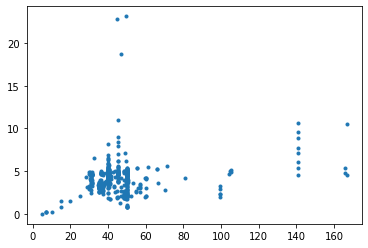

In [42]:
plt.plot(HYD,Ds,".")

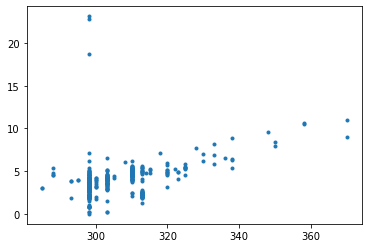

In [43]:
plt.plot(Ts,Ds,".")

ValueError: x and y must have same first dimension, but have shapes (91,) and (472,)

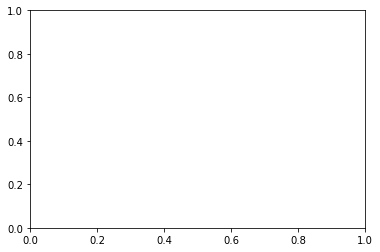

In [44]:
plt.plot(molfrac['CAL'],Ds,".")

In [45]:
DvsHYD = [HYD,Ds]

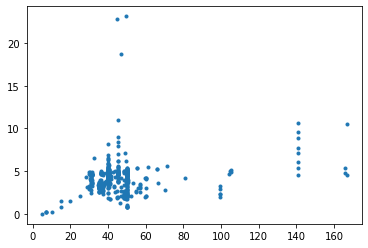

In [46]:
plt.plot(DvsHYD[0],DvsHYD[1],".")

40.54054054054054 4.7147 None CHARMM36 10.5281/zenodo.3237420
45.0 4.7157 None Slipids for lipids, Kohagen for NaCl 10.5281/zenodo.35193
45.0 4.9253 None CHARMM36 10.5281/zenodo.4040423
50.0 5.3119 None MacRog 10.5281/zenodo.3252052
40.3125 5.1716 None Slipids 10.5281/zenodo.3539263
35.0 3.4267 None Slipids 10.5281/zenodo.1129441
45.0 4.8018 None CHARMM36 with ECC-scaled ions 10.5281/zenodo.45008
40.0 4.5835 None CHARMM36 10.5281/zenodo.2653721
37.294 2.7083 None CHARMM36 10.5281/zenodo.3483785
45.0 4.8639 None Slipids for lipids and Smith & Dang for ions 10.5281/zenodo.259335
40.0 4.6595 None CHARMM36 10.5281/zenodo.2653721
140.68867924528303 5.3567 None CHARMM36 10.5281/zenodo.3950029
140.68867924528303 4.5714 None CHARMM36 10.5281/zenodo.3950029
105.0 4.9255 None CHARMM36 10.5281/zenodo.3997116
34.83050847457627 3.4389 None CHARMM36 10.5281/zenodo.1011096
31.0 4.3814 None Lipid14 10.5281/zenodo.3871008
31.46853146853147 4.6833 None CHARMM36 10.5281/zenodo.3237420
50.15972222222222 3

IndexError: list index out of range

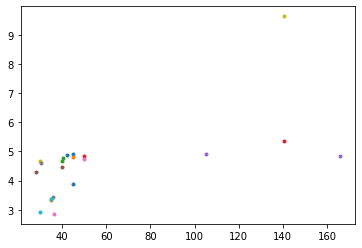

In [47]:
for i in range(len(HYD)):
    #print(lipidfrac['POPC'])
    print(HYD[i],Ds[i],FFSOL[i],FF[i],DOI[i])
    if FF[i] and 'CHARMM' in FF[i] and lipidfrac['POPC'][i] == 1:
        if molfrac['CAL'][i] == 0 and molfrac['SOD'][i] == 0:
            #print(HYD[i],molfrac['NCAL'][i],lipidfrac['POPG'][i],Ds[i])
            plt.plot(HYD[i],Ds[i],".")

In [48]:
for lipid in lipids_dict:
    lipidFRACtmp = []
    DsTMP = []
    for i in range(len(Ds)):
        #print(lipidfrac[lipid][i],Ds[i])
        if lipidfrac[lipid][i] > 0:
            lipidFRACtmp.append(lipidfrac[lipid][i])
            DsTMP.append(Ds[i])
    #print(lipidFRACtmp,DsTMP)
    print(lipid,np.corrcoef(lipidFRACtmp,DsTMP)[0][1])
    plt.plot(lipidFRACtmp,DsTMP,".")

IndexError: list index out of range

In [49]:
for molecule in molecules_dict:
    molFRACtmp = []
    DsTMP = []
    for i in range(len(Ds)):
        #print(lipidfrac[lipid][i],Ds[i])
        if molfrac[molecule][i] > 0:
            molFRACtmp.append(molfrac[molecule][i])
            DsTMP.append(Ds[i])
    #print(lipidFRACtmp,DsTMP)
    if molecule != 'NSOL':
        print(molecule,np.corrcoef(molFRACtmp,DsTMP)[0][1])
        #print(molFRACtmp,DsTMP)
        plt.plot(molFRACtmp,DsTMP,".")

IndexError: list index out of range

In [40]:
print(np.corrcoef(lipidfrac['CHOL'],Ds))

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 61 and the array at index 1 has size 242

In [214]:
lipidfrac['POPC']

[1.0,
 0.8,
 1.0,
 0.5,
 0.5,
 0.5,
 0.8333333333333334,
 0.5,
 1.0,
 1.0,
 1.0,
 1.0,
 0.5,
 1.0,
 0.0,
 0.6944444444444444,
 0.5,
 0.8064516129032258,
 0.7692307692307693,
 0.8333333333333334,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.8,
 1.0,
 0.5319148936170213,
 1.0,
 0.8333333333333334,
 0.8928571428571429,
 1.0,
 0.0,
 1.0]

In [152]:
DsTMP

[[4.9253,
  2.7083,
  3.3532,
  4.3036,
  2.8559,
  3.4487,
  3.4009,
  4.1111,
  3.2152,
  4.1224,
  3.1398,
  1.4669,
  4.671,
  3.5732,
  4.5294,
  5.3511,
  3.6223,
  4.4873,
  5.4521,
  3.6084,
  0.2023,
  2.87,
  2.9331,
  4.8491,
  4.9509,
  4.4117,
  3.7809,
  3.3411,
  3.6622,
  3.9801,
  4.86,
  4.1329,
  2.2933,
  5.642,
  4.0635,
  3.154,
  4.0776],
 [4.9253,
  2.7083,
  3.3532,
  4.3036,
  2.8559,
  3.4487,
  3.4009,
  4.1111,
  3.2152,
  4.1224,
  3.1398,
  1.4669,
  4.671,
  3.5732,
  4.5294,
  5.3511,
  3.6223,
  4.4873,
  5.4521,
  3.6084,
  0.2023,
  2.87,
  2.9331,
  4.8491,
  4.9509,
  4.4117,
  3.7809,
  3.3411,
  3.6622,
  3.9801,
  4.86,
  4.1329,
  2.2933,
  5.642,
  4.0635,
  3.154,
  4.0776],
 [4.9253,
  2.7083,
  3.3532,
  4.3036,
  2.8559,
  3.4487,
  3.4009,
  4.1111,
  3.2152,
  4.1224,
  3.1398,
  1.4669,
  4.671,
  3.5732,
  4.5294,
  5.3511,
  3.6223,
  4.4873,
  5.4521,
  3.6084,
  0.2023,
  2.87,
  2.9331,
  4.8491,
  4.9509,
  4.4117,
  3.7809,
  3.3